**Importing Libraries**

In [ ]:
!pip install xgboost


  Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl (190.9 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install lightgbm
!pip install catboost
!pip install imblearn
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 9.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" a

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

##Loading datasets

In [11]:
file_path = '/content/drive/MyDrive/european_cardholder.csv'
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

print("\nDataset shape:")
print(data.shape)

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17

##EDA##

##Check for missing values##

In [ ]:
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:

Time      0

V1        0

V2        0

V3        0

V4        0

V5        0

V6        0

V7        0

V8        0

V9        0

V10       0

V11       0

V12       0

V13       0

V14       0

V15       0

V16       0

V17       0

V18       0

V19       0

V20       0

V21       0

V22       0

V23       0

V24       0

V25       0

V26       0

V27       0

V28       0

Amount    0

Class     0

dtype: int64


##Checking for NaN values##

In [ ]:
NAN_values = data.isna().sum()
print("NAN values in each column:")
print(NAN_values)

NAN values in each column:

Time      0

V1        0

V2        0

V3        0

V4        0

V5        0

V6        0

V7        0

V8        0

V9        0

V10       0

V11       0

V12       0

V13       0

V14       0

V15       0

V16       0

V17       0

V18       0

V19       0

V20       0

V21       0

V22       0

V23       0

V24       0

V25       0

V26       0

V27       0

V28       0

Amount    0

Class     0

dtype: int64


##Class Distribution##

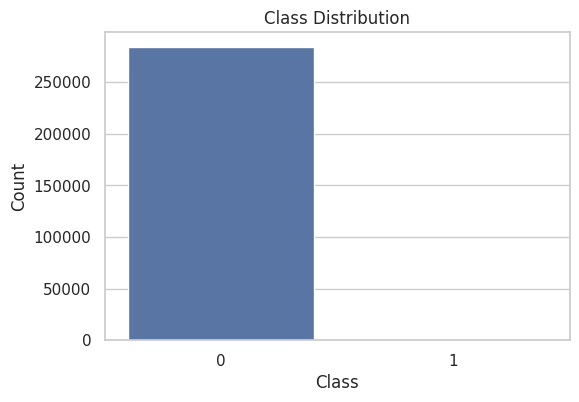



Class distribution:

Class

0    284315

1       492

Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_counts = data['Class'].value_counts()
print("\nClass distribution:")
print(class_counts)

##Amount Distribution#

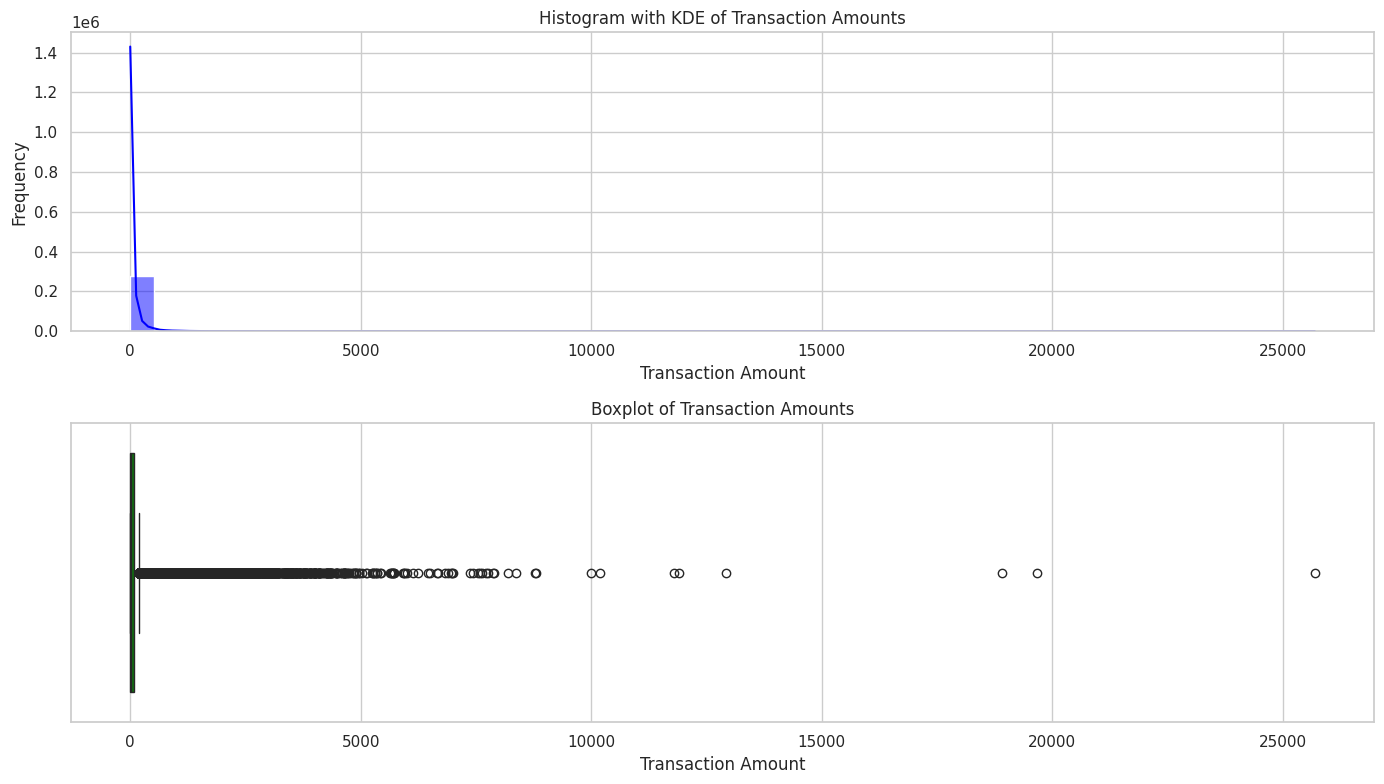

In [ ]:
plt.figure(figsize=(14, 8))

# Subplot 1: Histogram
plt.subplot(2, 1, 1)
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Histogram with KDE of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Subplot 2: Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x='Amount', data=data, color='green')
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Transaction Amount')

# Display the plots
plt.tight_layout()
plt.show()

##Time Distribution##

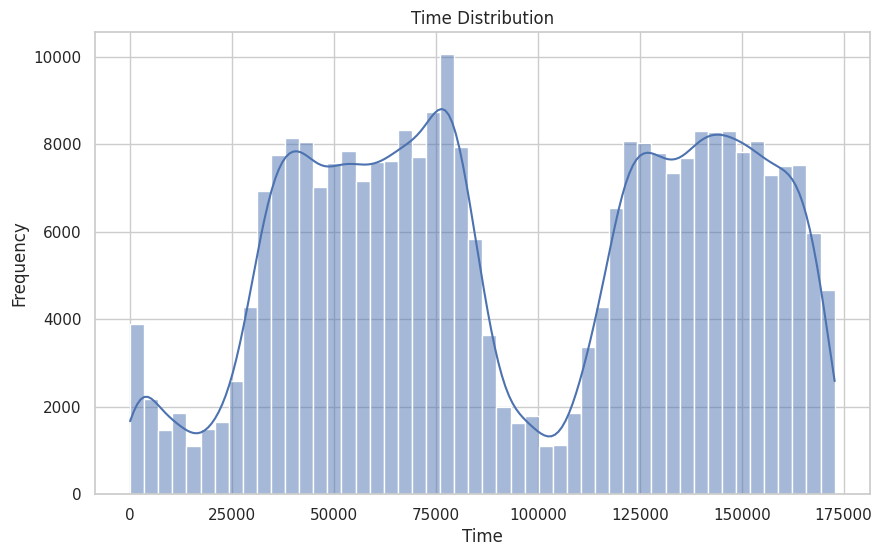

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

##Correlation Matrix##

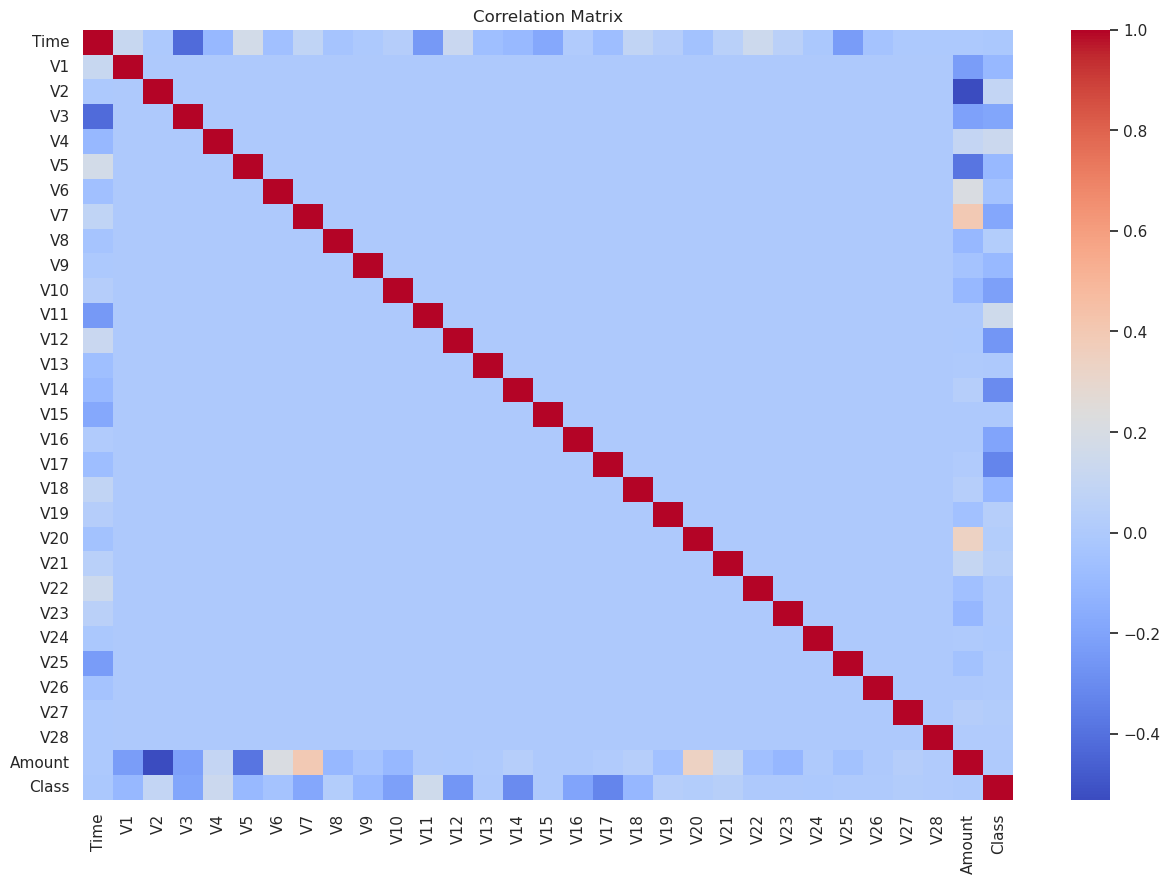

In [ ]:
plt.figure(figsize=(15, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##Feature Distribution for both classes##

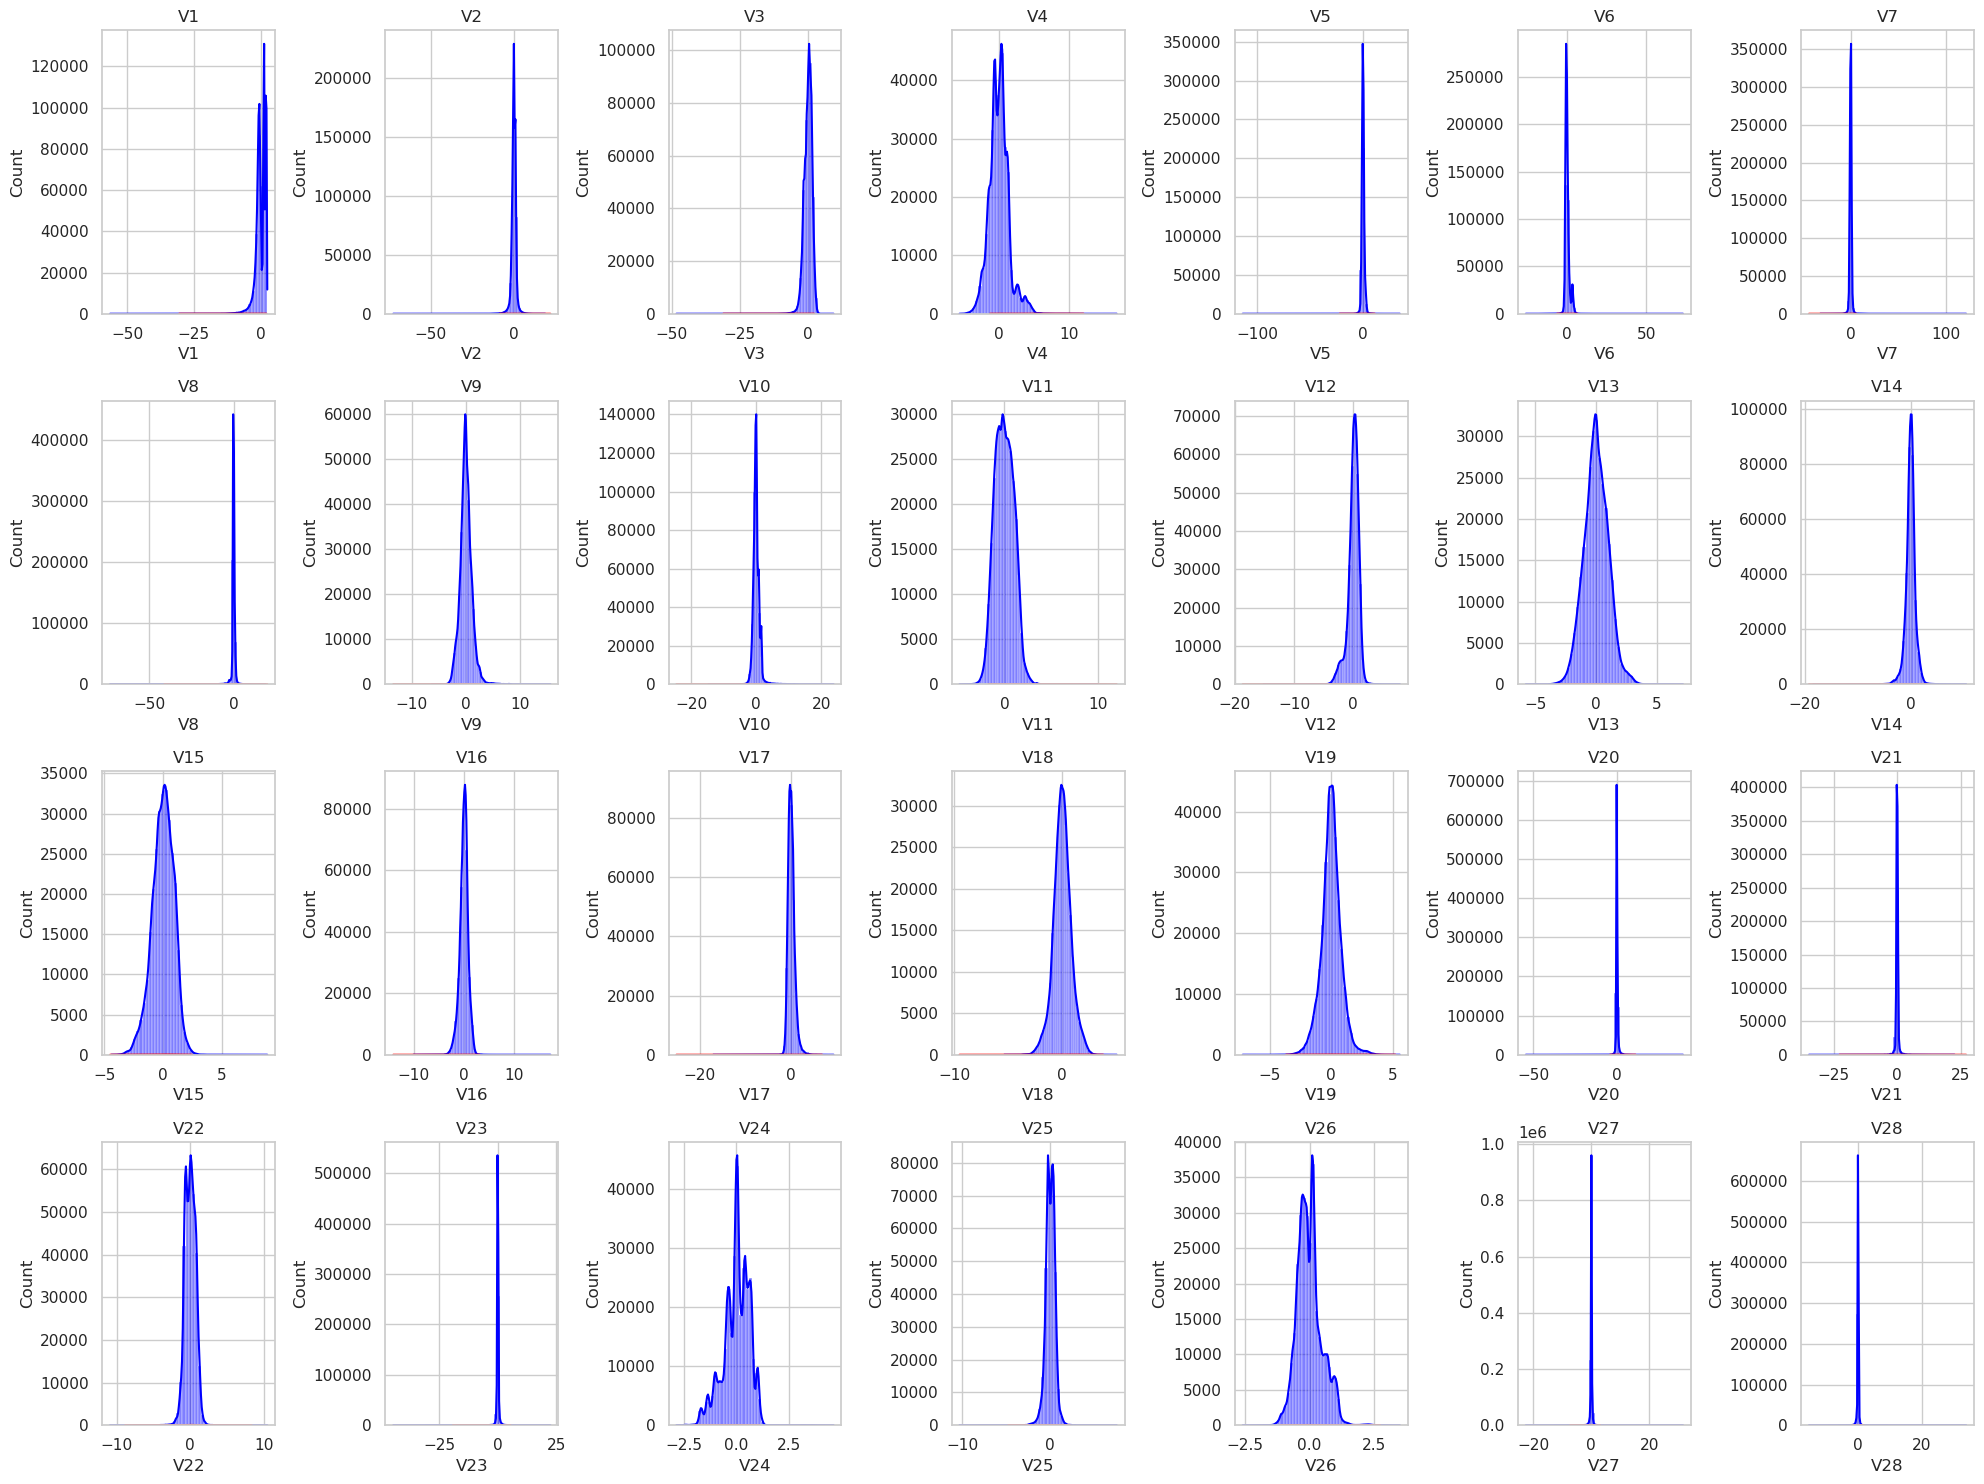

In [ ]:
fig, axs = plt.subplots(4, 7, figsize=(20, 15))
for i, ax in enumerate(axs.flatten()):
    if i < 28:
        sns.histplot(data[data['Class'] == 0][f'V{i+1}'], bins=50, color='blue', label='Non-Fraud', kde=True, ax=ax)
        sns.histplot(data[data['Class'] == 1][f'V{i+1}'], bins=50, color='red', label='Fraud', kde=True, ax=ax)
        ax.set_title(f'V{i+1}')
plt.tight_layout()
plt.show()

##Detailed feature analysis##

##Amt vs Class

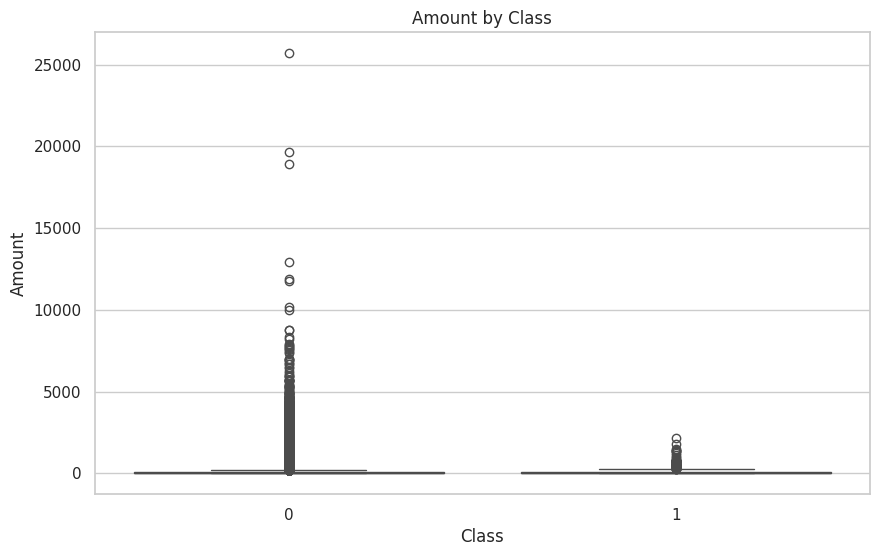

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

##Time vs Class##

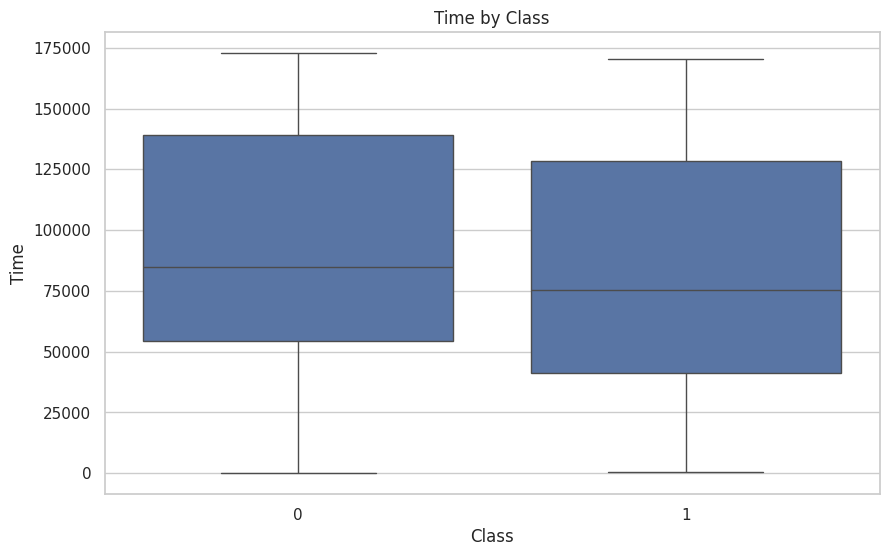

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=data)
plt.title('Time by Class')
plt.xlabel('Class')
plt.ylabel('Time')
plt.show()

## Pairplot of top features##


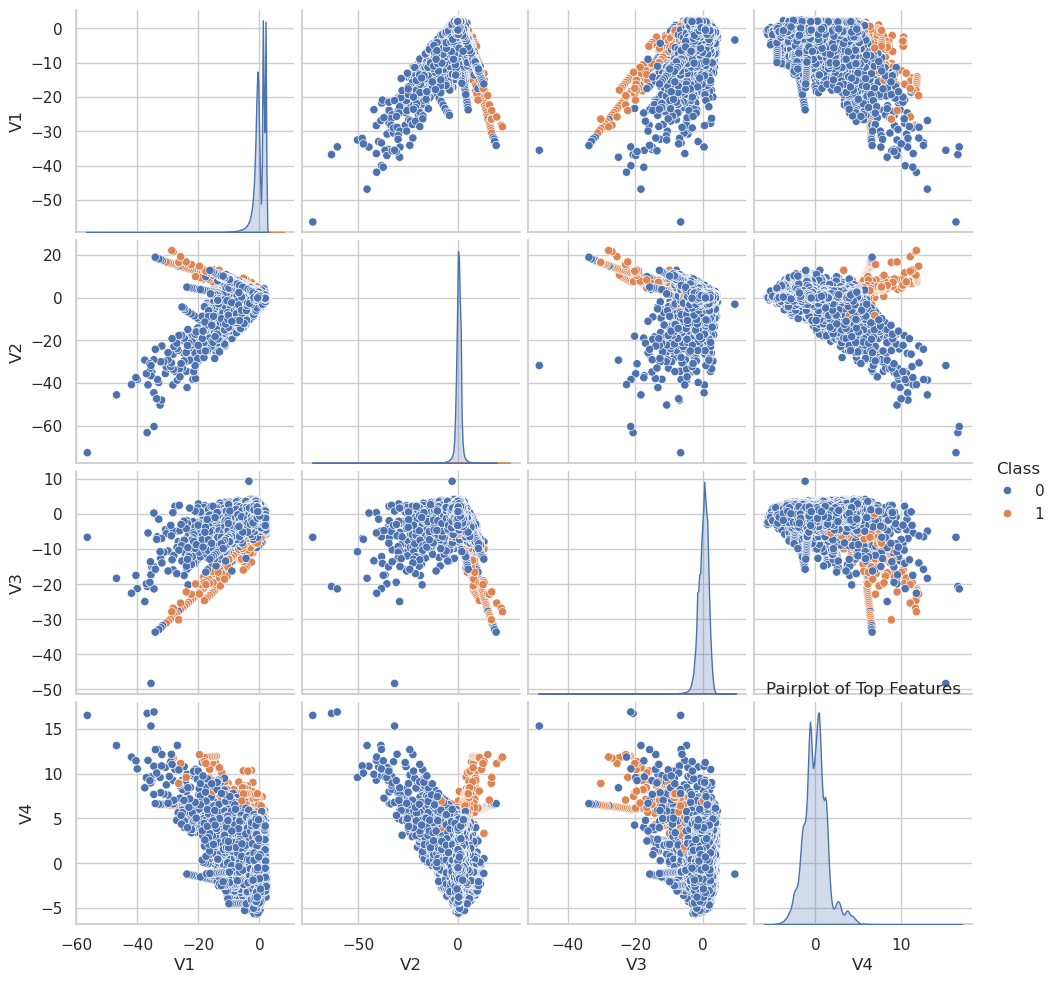

In [ ]:
top_features = data[['V1', 'V2', 'V3', 'V4', 'Class']]
sns.pairplot(top_features, hue='Class', diag_kind='kde')
plt.title('Pairplot of Top Features')
plt.show()

##Analyzing Correlation with the Target Variable##

In [ ]:
correlation_with_class = data.corr()['Class'].sort_values(ascending=False)
print("\nCorrelation with Class:")
print(correlation_with_class)



Correlation with Class:

Class     1.000000

V11       0.154876

V4        0.133447

V2        0.091289

V21       0.040413

V19       0.034783

V20       0.020090

V8        0.019875

V27       0.017580

V28       0.009536

Amount    0.005632

V26       0.004455

V25       0.003308

V22       0.000805

V23      -0.002685

V15      -0.004223

V13      -0.004570

V24      -0.007221

Time     -0.012323

V6       -0.043643

V5       -0.094974

V9       -0.097733

V1       -0.101347

V18      -0.111485

V7       -0.187257

V3       -0.192961

V16      -0.196539

V10      -0.216883

V12      -0.260593

V14      -0.302544

V17      -0.326481

Name: Class, dtype: float64


##Summary of EDA##

In [ ]:
eda_summary = {
    'Dataset Shape': data.shape,
    'Missing Values': missing_values,
    'Class Distribution': class_counts,
    'Correlation with Class': correlation_with_class
}

print("\nEDA Summary:")
print(eda_summary)



EDA Summary:

{'Dataset Shape': (284807, 31), 'Missing Values': Time      0

V1        0

V2        0

V3        0

V4        0

V5        0

V6        0

V7        0

V8        0

V9        0

V10       0

V11       0

V12       0

V13       0

V14       0

V15       0

V16       0

V17       0

V18       0

V19       0

V20       0

V21       0

V22       0

V23       0

V24       0

V25       0

V26       0

V27       0

V28       0

Amount    0

Class     0

dtype: int64, 'Class Distribution': Class

0    284315

1       492

Name: count, dtype: int64, 'Correlation with Class': Class     1.000000

V11       0.154876

V4        0.133447

V2        0.091289

V21       0.040413

V19       0.034783

V20       0.020090

V8        0.019875

V27       0.017580

V28       0.009536

Amount    0.005632

V26       0.004455

V25       0.003308

V22       0.000805

V23      -0.002685

V15      -0.004223

V13      -0.004570

V24      -0.007221

Time     -0.012323

V6       -0.043643

V5       

##Data Preprocessing##

In [ ]:
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

print("\nScaled 'Time' and 'Amount' features:")
print(data[['Time', 'Amount']].head(10))



Scaled 'Time' and 'Amount' features:

       Time    Amount

0 -1.996583  0.244964

1 -1.996583 -0.342475

2 -1.996562  1.160686

3 -1.996562  0.140534

4 -1.996541 -0.073403

5 -1.996541 -0.338556

6 -1.996499 -0.333279

7 -1.996436 -0.190107

8 -1.996436  0.019392

9 -1.996394 -0.338516


##Train Test Split#

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (227845, 30)

Testing set shape: (56962, 30)


##Handling data imbalance##

##Oversampling with SMOTE##

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE - Training set class distribution:")
print(pd.Series(y_train_smote).value_counts())



After SMOTE - Training set class distribution:

Class

0    227451

1    227451

Name: count, dtype: int64




After SMOTE - Training set class distribution:

Class

0    227451

1    227451

Name: count, dtype: int64


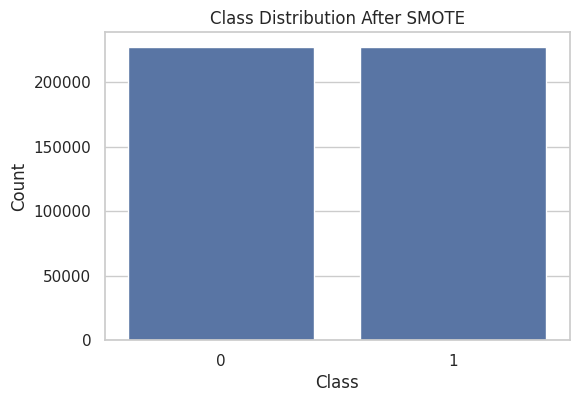

In [ ]:
class_distribution_after_smote = pd.Series(y_train_smote).value_counts()
print("\nAfter SMOTE - Training set class distribution:")
print(class_distribution_after_smote)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

##Over-Sampling with ADASYN##

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print("\nAfter ADASYN - Training set class distribution:")
print(pd.Series(y_train_adasyn).value_counts())



After ADASYN - Training set class distribution:

Class

0    227451

1    227407

Name: count, dtype: int64




After ADASYN - Training set class distribution:

Class

0    227451

1    227407

Name: count, dtype: int64



After Manual Balancing - Training set class distribution:

Class

0    227407

1    227407

Name: count, dtype: int64


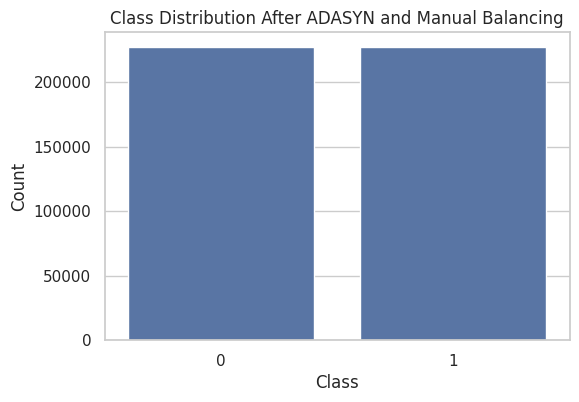

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

class_distribution_after_adasyn = pd.Series(y_train_adasyn).value_counts()
print("\nAfter ADASYN - Training set class distribution:")
print(class_distribution_after_adasyn)

min_class_count = min(class_distribution_after_adasyn)
balanced_indices = np.hstack([
    np.random.choice(np.where(y_train_adasyn == 0)[0], min_class_count, replace=False),
    np.random.choice(np.where(y_train_adasyn == 1)[0], min_class_count, replace=False)
])
X_train_balanced = X_train_adasyn.iloc[balanced_indices]
y_train_balanced = y_train_adasyn.iloc[balanced_indices]

class_distribution_after_balancing = pd.Series(y_train_balanced).value_counts()
print("\nAfter Manual Balancing - Training set class distribution:")
print(class_distribution_after_balancing)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_balanced)
plt.title('Class Distribution After ADASYN and Manual Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

##Under-Sampling with Random UnderSampler##

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("\nAfter Random UnderSampler - Training set class distribution:")
print(pd.Series(y_train_rus).value_counts())



After Random UnderSampler - Training set class distribution:

Class

0    394

1    394

Name: count, dtype: int64


##Combined Over- and Under-Sampling with SMOTEENN##

In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

print("\nAfter SMOTEENN - Training set class distribution:")
print(pd.Series(y_train_smoteenn).value_counts())



After SMOTEENN - Training set class distribution:

Class

1    227451

0    227079

Name: count, dtype: int64


##Combined Over- and Under-Sampling with SMOTETomek##

In [ ]:
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

print("\nAfter SMOTETomek - Training set class distribution:")
print(pd.Series(y_train_smotetomek).value_counts())



After SMOTETomek - Training set class distribution:

Class

0    227451

1    227451

Name: count, dtype: int64


##Summary of Prepropcessing##

In [ ]:
resampling_summary = {
    'Original Training Set Shape': X_train.shape,
    'SMOTE Training Set Shape': X_train_smote.shape,
    'ADASYN Training Set Shape': X_train_adasyn.shape,
    'Random UnderSampler Training Set Shape': X_train_rus.shape,
    'SMOTEENN Training Set Shape': X_train_smoteenn.shape,
    'SMOTETomek Training Set Shape': X_train_smotetomek.shape,
}

print("\nResampling Summary:")
print(resampling_summary)



Resampling Summary:

{'Original Training Set Shape': (227845, 30), 'SMOTE Training Set Shape': (454902, 30), 'ADASYN Training Set Shape': (454858, 30), 'Random UnderSampler Training Set Shape': (788, 30), 'SMOTEENN Training Set Shape': (454530, 30), 'SMOTETomek Training Set Shape': (454902, 30)}


In [ ]:
!pip install tqdm


##SECOND DATASET

##Sparkov dataset


In [ ]:
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')


train_df = pd.read_csv('/content/fraudTest.csv')
test_df = pd.read_csv('/content/fraudTrain.csv')

# Merging the datasets (it was originally splitted into test and train )
merged_df = pd.concat([train_df, test_df], ignore_index=True)

# Saving  to Google Drive
merged_df.to_csv('/content/drive/MyDrive/sparkov.csv', index=False)

print("Merged dataset saved to Google Drive successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Merged dataset saved to Google Drive successfully!


In [ ]:
import pandas as pd
ds2 = pd.read_csv('/content/drive/MyDrive/sparkov.csv')

print("Dataset Head:")
print(ds2.head())

print("\nDataset Info:")
print(ds2.info())



Dataset Head:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union 

##EDA

##Checking for missing values##

In [ ]:
missing_values = ds2.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


##Checking for NaN values##

In [ ]:
missing_values = ds2.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


##Class Distribution##

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

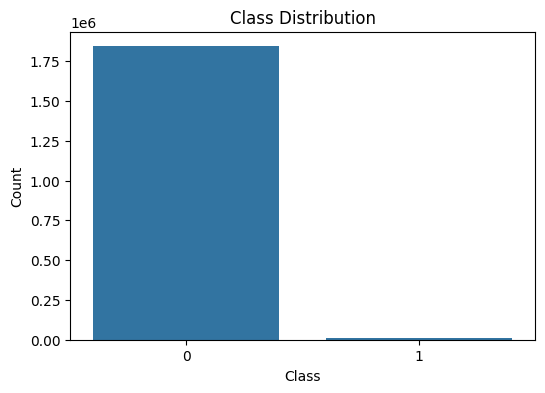


Class distribution:
is_fraud
0    1842743
1       9651
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=ds2)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_counts = ds2['is_fraud'].value_counts()
print("\nClass distribution:")
print(class_counts)

##Statistical Analysis

In [ ]:
# Generating summary statistics for numerical columns
print(df.describe())

# Generating summary statistics for categorical columns
print(df.describe(include=['object']))


         Unnamed: 0        cc_num            amt            zip  \
count  1.296680e+05  1.296680e+05  129668.000000  129668.000000   
mean   6.492634e+05  4.163718e+17      70.138931   48806.972846   
std    3.738773e+05  1.307555e+18     141.956590   26880.069592   
min    5.000000e+00  6.041621e+10       1.000000    1257.000000   
25%    3.256898e+05  1.800365e+14       9.660000   26237.000000   
50%    6.491340e+05  3.519233e+15      47.530000   48174.000000   
75%    9.731058e+05  4.642255e+15      83.060000   72042.000000   
max    1.296673e+06  4.992346e+18    9092.750000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  129668.000000  129668.000000  1.296680e+05  1.296680e+05   
mean       38.547207     -90.243727  8.854176e+04  1.349276e+09   
std         5.067087      13.756958  3.030224e+05  1.282344e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.798000  7.430000e+02  1.338807e+

##Data Distribution

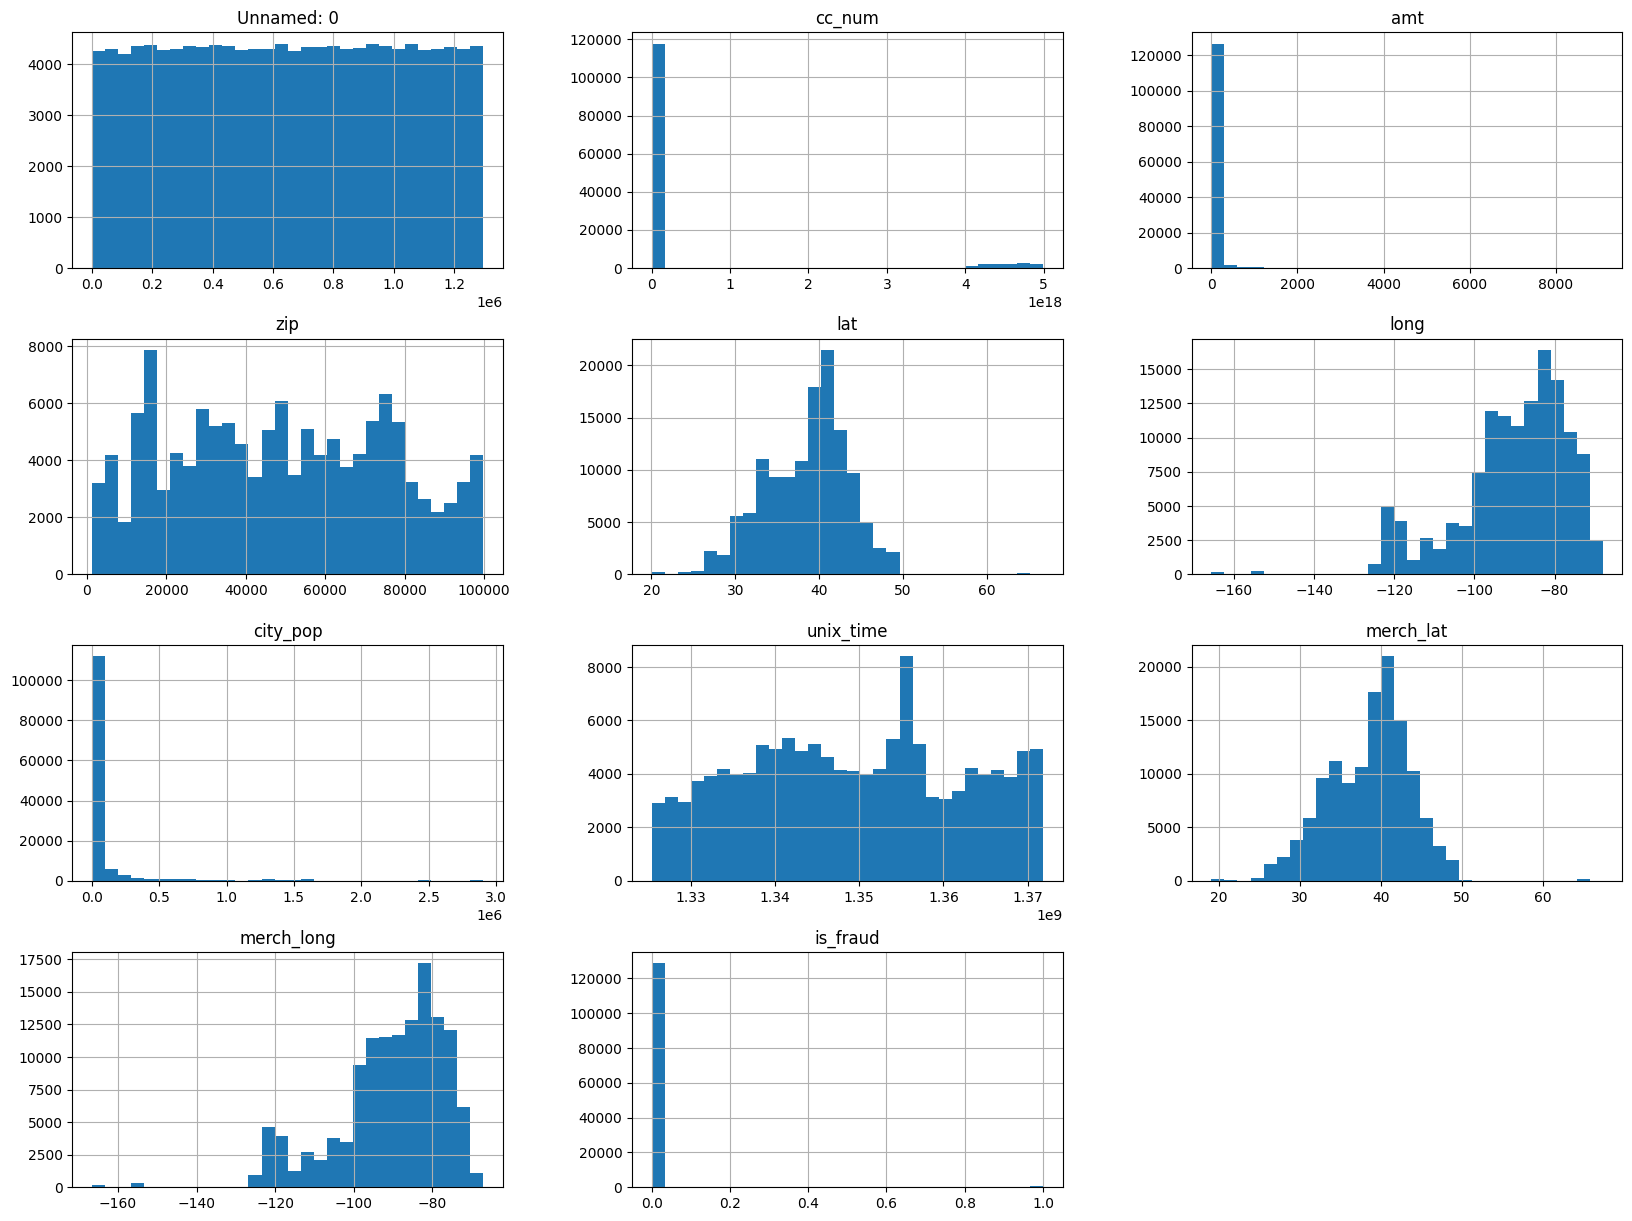

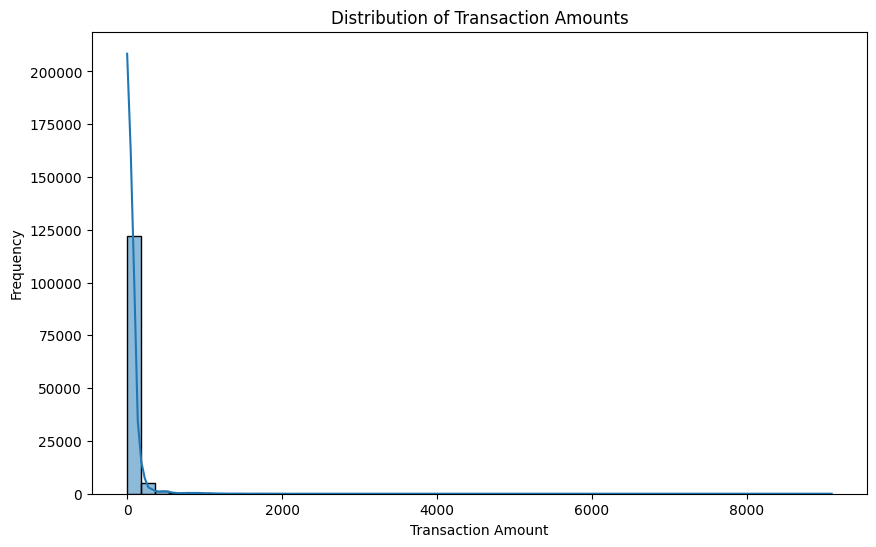

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df.hist(bins=30, figsize=(20,15))
plt.show()

# Distribution of 'amt' (transaction amount)
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


##Categorical Variables Analysis

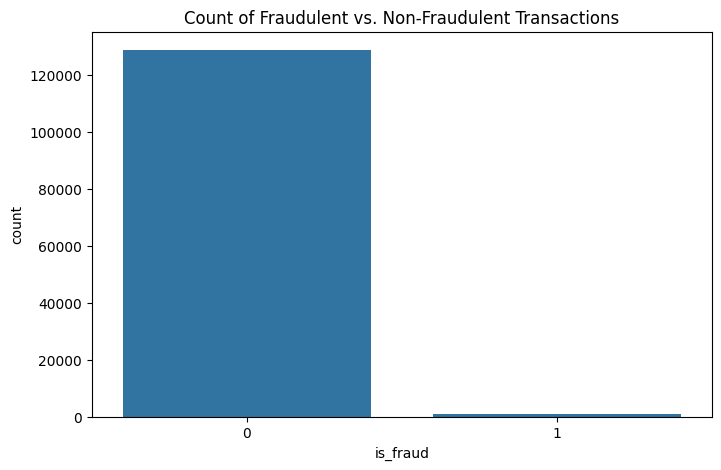

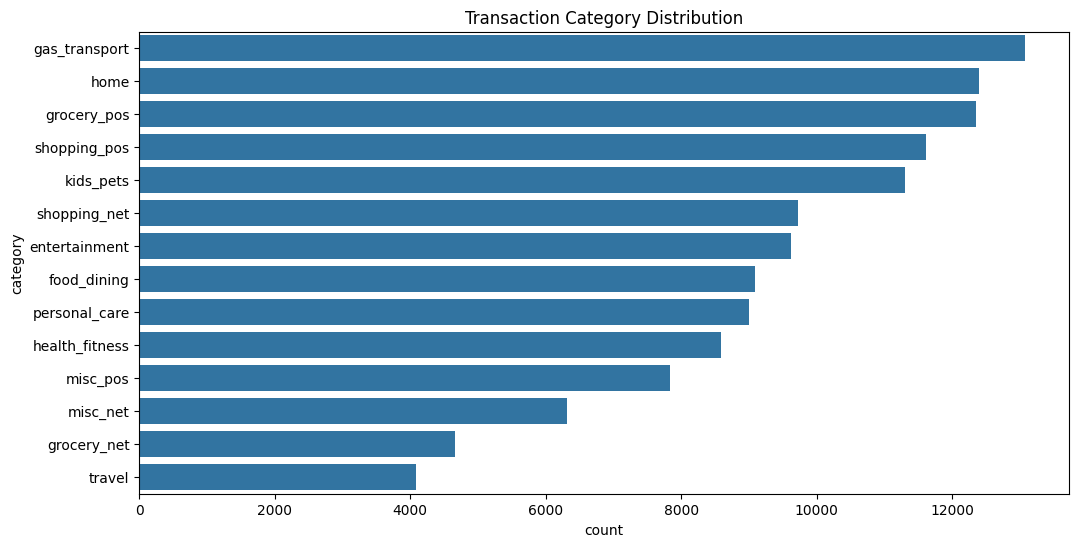

In [ ]:
# Countplot of 'is_fraud'
plt.figure(figsize=(8, 5))
sns.countplot(x='is_fraud', data=df)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

# Countplot of 'category'
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Transaction Category Distribution')
plt.show()


##Correlation Analysis

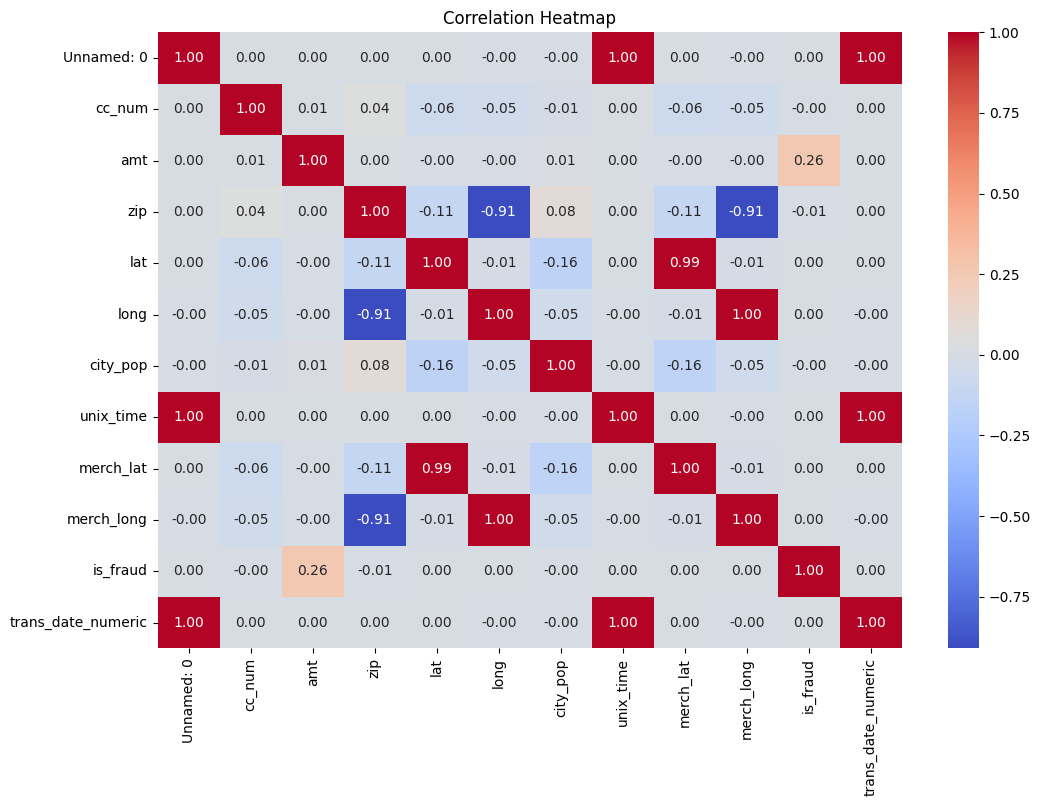

In [ ]:
# Converting datetime to numeric
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_numeric'] = df['trans_date_trans_time'].apply(lambda x: x.timestamp())

# Recalculating the correlation matrix with the new numeric column
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##Feature Relationships

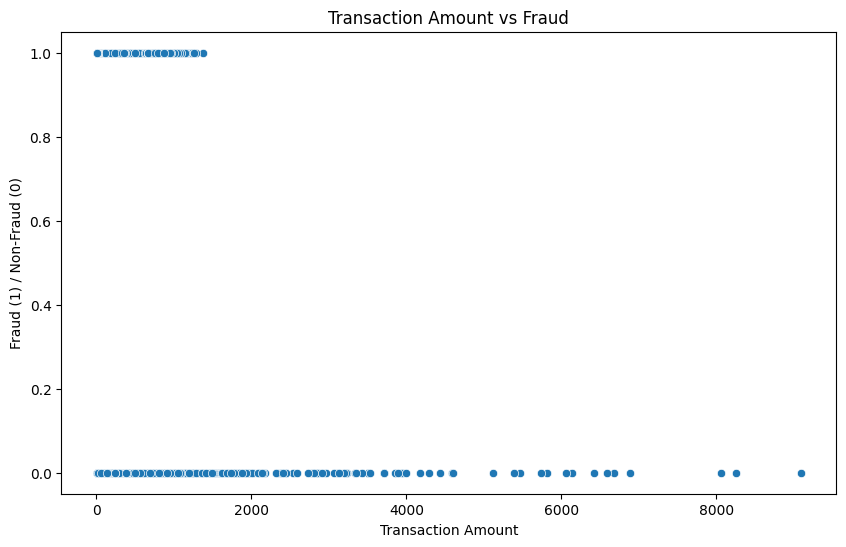

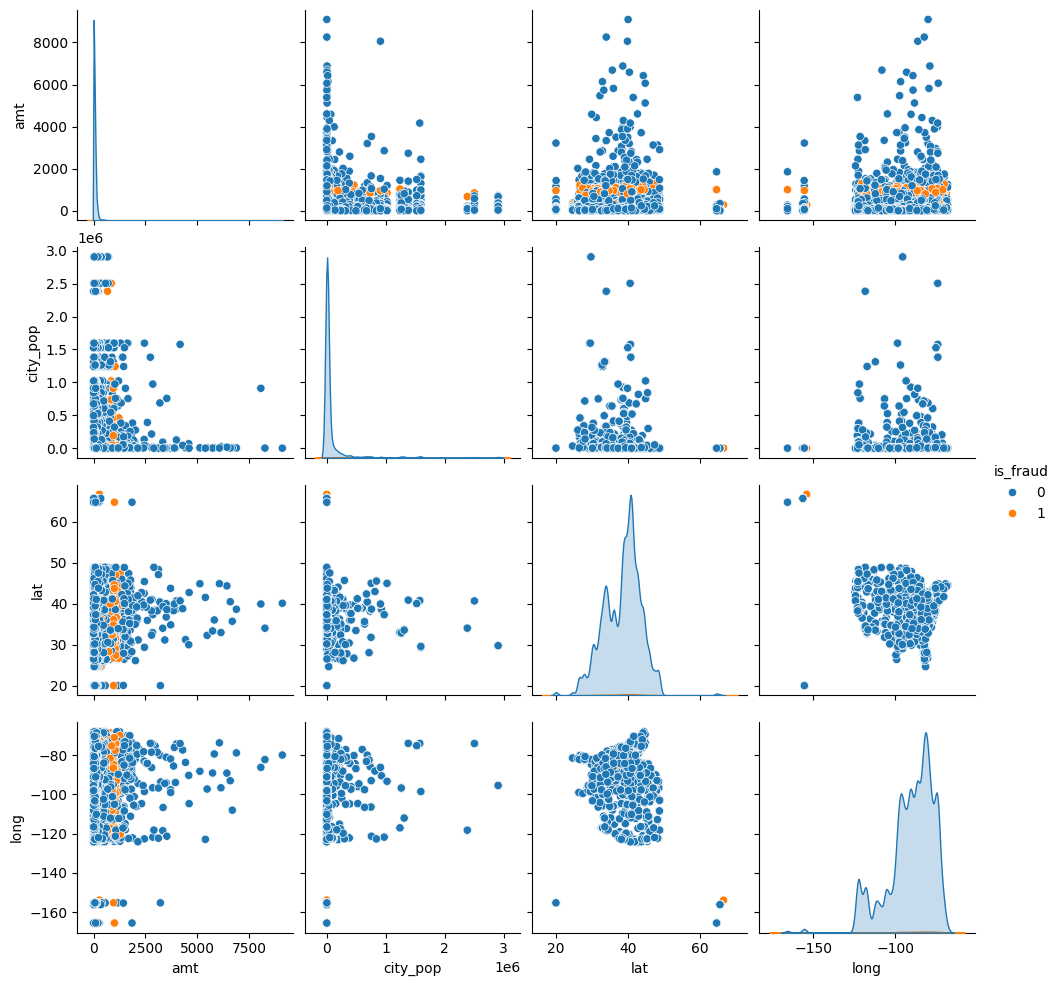

In [ ]:
# Scatter plot: 'amt' vs 'is_fraud'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='is_fraud', data=df)
plt.title('Transaction Amount vs Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Fraud (1) / Non-Fraud (0)')
plt.show()


selected_columns = ['amt', 'city_pop', 'lat', 'long', 'is_fraud']
sns.pairplot(df[selected_columns], hue='is_fraud', diag_kind='kde')
plt.show()


##Time Series Analysis

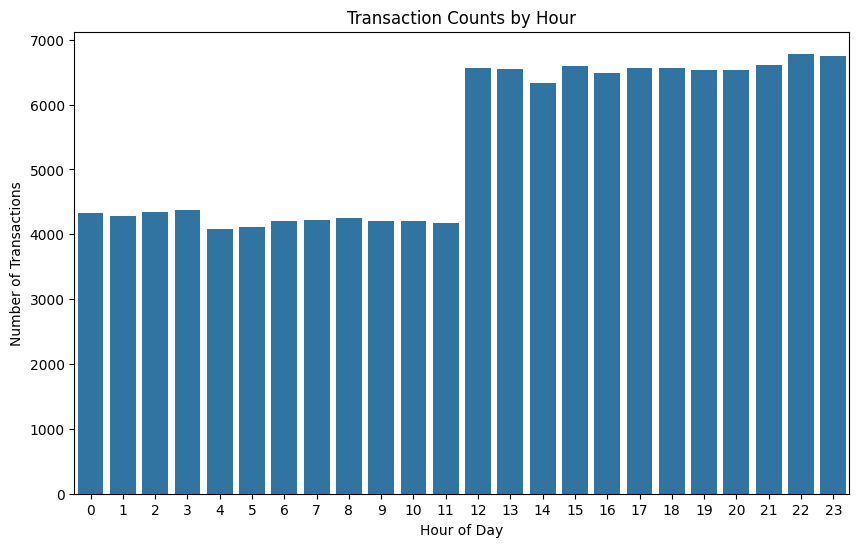

In [ ]:
# Converting 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extracting day, hour, month, etc.
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month


plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', data=df)
plt.title('Transaction Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()


##Insights and Anomalies

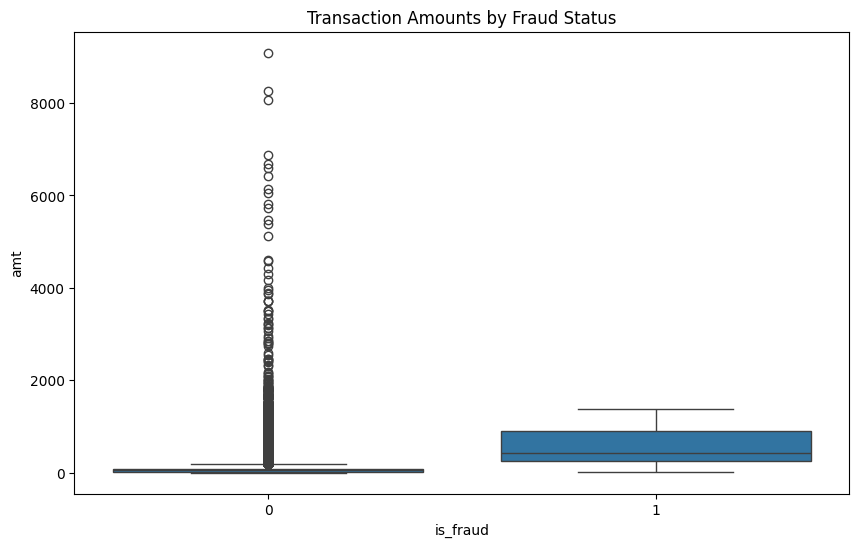


Unique values in category: ['misc_pos' 'health_fitness' 'shopping_pos' 'home' 'gas_transport'
 'grocery_pos' 'food_dining' 'shopping_net' 'entertainment' 'grocery_net'
 'kids_pets' 'personal_care' 'misc_net' 'travel']

Unique values in gender: ['M' 'F']

Unique values in state: ['PA' 'OR' 'NY' 'WY' 'VT' 'MI' 'LA' 'TX' 'AL' 'MD' 'MO' 'NE' 'FL' 'WI'
 'NJ' 'CA' 'VA' 'IN' 'ND' 'WV' 'AR' 'IL' 'MT' 'OH' 'NC' 'CT' 'WA' 'TN'
 'KS' 'SD' 'SC' 'UT' 'OK' 'MN' 'IA' 'HI' 'AZ' 'NM' 'MA' 'ID' 'GA' 'KY'
 'AK' 'MS' 'NH' 'ME' 'DC' 'CO' 'NV' 'RI']


In [ ]:
# Cheking for  potential outliers in 'amt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.show()

# Check for unusual or unexpected values in categorical features
for col in ['category', 'gender', 'state']:
    print(f"\nUnique values in {col}: {df[col].unique()}")


##Traditional Machine Learning Models

##Logistic Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
}

# Evaluating with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:16<00:00, 16.47s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:16<01:22, 16.49s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [00:27<00:00, 27.41s/it]

Resampling Techniques:  33%|███▎      | 2/6 [00:43<01:31, 22.92s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [00:24<00:00, 24.99s/it]

Resampling Techniques:  50%|█████     | 3/6 [01:08<01:11, 23.87s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:06<00:00,  6.97s/it]

Resampling Techniques:  67%|██████▋   | 4/6 [01:15<00:34, 17.20s/it]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [00:36<00:00, 36.99s/it]

Resampling Techniques:



Original Method (Group 1):



  Logistic Regression:

    Precision: 0.8636

    Recall: 0.5816

    F1 Score: 0.6951

    ROC AUC: 0.9749



SMOTE Method (Group 1):



  Logistic Regression:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787



ADASYN Method (Group 1):



  Logistic Regression:

    Precision: 0.0177

    Recall: 0.9388

    F1 Score: 0.0347

    ROC AUC: 0.9777



RandomUnderSampler Method (Group 1):



  Logistic Regression:

    Precision: 0.0421

    Recall: 0.9286

    F1 Score: 0.0805

    ROC AUC: 0.9795



SMOTEENN Method (Group 1):



  Logistic Regression:

    Precision: 0.0568

    Recall: 0.9286

    F1 Score: 0.1070

    ROC AUC: 0.9785



SMOTETomek Method (Group 1):



  Logistic Regression:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787


##Decision Tree##

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'Decision Tree': LogisticRegression(random_state=42, max_iter=1000),
}

# Evaluating with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:16<00:00, 16.42s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:16<01:22, 16.43s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [00:28<00:00, 28.55s/it]

Resampling Techniques:  33%|███▎      | 2/6 [00:44<01:34, 23.57s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [00:27<00:00, 27.91s/it]

Resampling Techniques:  50%|█████     | 3/6 [01:12<01:16, 25.56s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:07<00:00,  7.48s/it]

Resampling Techniques:  67%|██████▋   | 4/6 [01:20<00:36, 18.42s/it]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [00:39<00:00, 39.28s/it]

Resampling Techniques:



Original Method (Group 1):



  Decision Tree:

    Precision: 0.8636

    Recall: 0.5816

    F1 Score: 0.6951

    ROC AUC: 0.9749



SMOTE Method (Group 1):



  Decision Tree:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787



ADASYN Method (Group 1):



  Decision Tree:

    Precision: 0.0177

    Recall: 0.9388

    F1 Score: 0.0347

    ROC AUC: 0.9777



RandomUnderSampler Method (Group 1):



  Decision Tree:

    Precision: 0.0421

    Recall: 0.9286

    F1 Score: 0.0805

    ROC AUC: 0.9795



SMOTEENN Method (Group 1):



  Decision Tree:

    Precision: 0.0568

    Recall: 0.9286

    F1 Score: 0.1070

    ROC AUC: 0.9785



SMOTETomek Method (Group 1):



  Decision Tree:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787


##Random Forest

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'Random Forest': LogisticRegression(random_state=42, max_iter=1000),
}

# Evaluating models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:16<00:00, 16.47s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:16<01:22, 16.48s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [00:27<00:00, 27.58s/it]

Resampling Techniques:  33%|███▎      | 2/6 [00:44<01:32, 23.02s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [00:24<00:00, 24.59s/it]

Resampling Techniques:  50%|█████     | 3/6 [01:08<01:11, 23.74s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

Resampling Techniques:  67%|██████▋   | 4/6 [01:10<00:30, 15.12s/it]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [00:32<00:00, 32.99s/it]

Resampling Techniques:



Original Method (Group 1):



  Random Forest:

    Precision: 0.8636

    Recall: 0.5816

    F1 Score: 0.6951

    ROC AUC: 0.9749



SMOTE Method (Group 1):



  Random Forest:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787



ADASYN Method (Group 1):



  Random Forest:

    Precision: 0.0177

    Recall: 0.9388

    F1 Score: 0.0347

    ROC AUC: 0.9777



RandomUnderSampler Method (Group 1):



  Random Forest:

    Precision: 0.0421

    Recall: 0.9286

    F1 Score: 0.0805

    ROC AUC: 0.9795



SMOTEENN Method (Group 1):



  Random Forest:

    Precision: 0.0568

    Recall: 0.9286

    F1 Score: 0.1070

    ROC AUC: 0.9785



SMOTETomek Method (Group 1):



  Random Forest:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787


##Gradient Boosting

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc


group_1_models = {
    'Gradient Bossting': LogisticRegression(random_state=42, max_iter=1000),
}

# Evaluating Group 1 models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:16<00:00, 16.85s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:16<01:24, 16.86s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [00:29<00:00, 29.66s/it]

Resampling Techniques:  33%|███▎      | 2/6 [00:46<01:37, 24.40s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [00:28<00:00, 28.20s/it]

Resampling Techniques:  50%|█████     | 3/6 [01:14<01:18, 26.14s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

Resampling Techniques:  67%|██████▋   | 4/6 [01:16<00:33, 16.62s/it]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [00:38<00:00, 38.57s/it]

Resampling Techniques:



Original Method (Group 1):



  Gradient Bossting:

    Precision: 0.8636

    Recall: 0.5816

    F1 Score: 0.6951

    ROC AUC: 0.9749



SMOTE Method (Group 1):



  Gradient Bossting:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787



ADASYN Method (Group 1):



  Gradient Bossting:

    Precision: 0.0177

    Recall: 0.9388

    F1 Score: 0.0347

    ROC AUC: 0.9777



RandomUnderSampler Method (Group 1):



  Gradient Bossting:

    Precision: 0.0421

    Recall: 0.9286

    F1 Score: 0.0805

    ROC AUC: 0.9795



SMOTEENN Method (Group 1):



  Gradient Bossting:

    Precision: 0.0568

    Recall: 0.9286

    F1 Score: 0.1070

    ROC AUC: 0.9785



SMOTETomek Method (Group 1):



  Gradient Bossting:

    Precision: 0.0593

    Recall: 0.9286

    F1 Score: 0.1115

    ROC AUC: 0.9787


##Support Vector Machine

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'SVM': SVC(random_state=42, max_iter=1000, probability=True),
}

# Evaluating  models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

  warnings.warn(



Models (Original): 100%|██████████| 1/1 [04:11<00:00, 251.31s/it]

Resampling Techniques:  17%|█▋        | 1/6 [04:11<20:56, 251.32s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

  warnings.warn(



Models (SMOTE): 100%|██████████| 1/1 [09:10<00:00, 550.57s/it]

Resampling Techniques:  33%|███▎      | 2/6 [13:21<28:29, 427.35s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:2



Original Method (Group 1):



  SVM:

    Precision: 0.9531

    Recall: 0.6224

    F1 Score: 0.7531

    ROC AUC: 0.9574



SMOTE Method (Group 1):



  SVM:

    Precision: 0.0008

    Recall: 0.4694

    F1 Score: 0.0016

    ROC AUC: 0.1274



ADASYN Method (Group 1):



  SVM:

    Precision: 0.0005

    Recall: 0.2755

    F1 Score: 0.0010

    ROC AUC: 0.1058



RandomUnderSampler Method (Group 1):



  SVM:

    Precision: 0.0827

    Recall: 0.8878

    F1 Score: 0.1513

    ROC AUC: 0.9840



SMOTEENN Method (Group 1):



  SVM:

    Precision: 0.0008

    Recall: 0.4388

    F1 Score: 0.0015

    ROC AUC: 0.1039



SMOTETomek Method (Group 1):



  SVM:

    Precision: 0.0008

    Recall: 0.4694

    F1 Score: 0.0016

    ROC AUC: 0.1274


##KNN

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.predict(X_test)  # Use predict if predict_proba is not available
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
}

# Evaluating  models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results


for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:40<00:00, 40.92s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:40<03:24, 40.93s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [01:16<00:00, 76.42s/it]

Resampling Techniques:  33%|███▎      | 2/6 [01:57<04:07, 61.81s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [01:13<00:00, 73.71s/it]

Resampling Techniques:  50%|█████     | 3/6 [03:11<03:21, 67.25s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

Resampling Techniques:  67%|██████▋   | 4/6 [03:13<01:22, 41.49s/it]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [01:13<00:00, 73.05s/it]

Resampling Techniques:



Original Method (Group 1):



  KNN:

    Precision: 0.9383

    Recall: 0.7755

    F1 Score: 0.8492

    ROC AUC: 0.9336



SMOTE Method (Group 1):



  KNN:

    Precision: 0.4830

    Recall: 0.8673

    F1 Score: 0.6204

    ROC AUC: 0.9434



ADASYN Method (Group 1):



  KNN:

    Precision: 0.4830

    Recall: 0.8673

    F1 Score: 0.6204

    ROC AUC: 0.9434



RandomUnderSampler Method (Group 1):



  KNN:

    Precision: 0.0559

    Recall: 0.8980

    F1 Score: 0.1053

    ROC AUC: 0.9645



SMOTEENN Method (Group 1):



  KNN:

    Precision: 0.4257

    Recall: 0.8776

    F1 Score: 0.5733

    ROC AUC: 0.9484



SMOTETomek Method (Group 1):



  KNN:

    Precision: 0.4830

    Recall: 0.8673

    F1 Score: 0.6204

    ROC AUC: 0.9434


##Naive Bayes

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.predict(X_test)  # Use predict if predict_proba is not available
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'Naive Bayes': GaussianNB(),
}

# Evaluate models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

Resampling Techniques:  17%|█▋        | 1/6 [00:00<00:01,  2.93it/s]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Resampling Techniques:  33%|███▎      | 2/6 [00:00<00:01,  2.36it/s]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Resampling Techniques:  50%|█████     | 3/6 [00:01<00:01,  2.18it/s]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

Resampling Techniques:  67%|██████▋   | 4/6 [00:01<00:00,  2.91it/s]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Resampling Techniques:



Original Method (Group 1):



  Naive Bayes:

    Precision: 0.0604

    Recall: 0.8163

    F1 Score: 0.1124

    ROC AUC: 0.9670



SMOTE Method (Group 1):



  Naive Bayes:

    Precision: 0.0596

    Recall: 0.8673

    F1 Score: 0.1115

    ROC AUC: 0.9629



ADASYN Method (Group 1):



  Naive Bayes:

    Precision: 0.0385

    Recall: 0.8878

    F1 Score: 0.0739

    ROC AUC: 0.9680



RandomUnderSampler Method (Group 1):



  Naive Bayes:

    Precision: 0.0512

    Recall: 0.8571

    F1 Score: 0.0966

    ROC AUC: 0.9642



SMOTEENN Method (Group 1):



  Naive Bayes:

    Precision: 0.0593

    Recall: 0.8673

    F1 Score: 0.1110

    ROC AUC: 0.9629



SMOTETomek Method (Group 1):



  Naive Bayes:

    Precision: 0.0596

    Recall: 0.8673

    F1 Score: 0.1115

    ROC AUC: 0.9629


##XGBoost

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.predict(X_test)  # Use predict if predict_proba is not available
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}

# Evaluate Group 1 models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:49:21] WARNING: /workspace/src/learner.cc:740: 

Parameters: { "use_label_encoder" } are not used.



  warnings.warn(smsg, UserWarning)



Models (Original): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:02<00:11,  2.25s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:49:24] WARNING: /workspace/src/learner.cc:740: 

Parameters: { "use_label_encoder" } are not used.



  warnings.warn(smsg, UserWarning)



Models (SMOTE): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

Resampling Techniques:  33%|███▎      | 2/6 [00:06<00:13,  3.35s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarni



Original Method (Group 1):



  XGBoost:

    Precision: 0.9620

    Recall: 0.7755

    F1 Score: 0.8588

    ROC AUC: 0.9811



SMOTE Method (Group 1):



  XGBoost:

    Precision: 0.7217

    Recall: 0.8469

    F1 Score: 0.7793

    ROC AUC: 0.9883



ADASYN Method (Group 1):



  XGBoost:

    Precision: 0.7434

    Recall: 0.8571

    F1 Score: 0.7962

    ROC AUC: 0.9887



RandomUnderSampler Method (Group 1):



  XGBoost:

    Precision: 0.0399

    Recall: 0.9388

    F1 Score: 0.0766

    ROC AUC: 0.9825



SMOTEENN Method (Group 1):



  XGBoost:

    Precision: 0.6967

    Recall: 0.8673

    F1 Score: 0.7727

    ROC AUC: 0.9847



SMOTETomek Method (Group 1):



  XGBoost:

    Precision: 0.7217

    Recall: 0.8469

    F1 Score: 0.7793

    ROC AUC: 0.9883


##LightGBM

In [ ]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'LightGBM': LGBMClassifier(random_state=42),
}

# Evaluate Group 1 models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 227451

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030769 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 7650

[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339

[LightGBM] [Info] Start training from score -6.358339




Models (Original): 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:02<00:10,  2.20s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072379 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 7650

[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000




Models (SMOTE): 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]

Resampling Techniques:  33%|███▎      | 2/6 [00:06<00:13,  3.34s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 227407, number of negative: 227451

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035064 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 7650

[LightGBM] [Info] Number of data points in the train set: 454858, number of used features: 30

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499952 -> initscore=-0.000193

[LightGBM] [Info] Start training from score -0.000193




Models (ADASYN): 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]

Resampling Techniques:  50%|█████     | 3/6 [00:09<00:09,  3.29s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 394

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 7650

[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 30

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf




Models (RandomUnderSampler): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Resampling Techniques:  67%|██████▋   | 4/6 [00:10<00:04,  2.18s/it]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 227451, number of negative: 227079

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034429 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 7650

[LightGBM] [Info] Number of data points in the train set: 454530, number of used features: 30

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500409 -> initscore=0.001637

[LightGBM] [Info] Start training from score 0.001637




Models (SMOTEENN): 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]

Resampling Techniques:  83%|████████▎ | 5/6 [00:13<00:02,  2.54s/it]

Models (SMOTETomek):   0%|          | 0/1 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033809 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 7650

[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000




Models (SMOTETomek): 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

Resampling Techniques: 100%|██████████| 6/6 [00:16<00:00,  2.73s/it]A



Original Method (Group 1):



  LightGBM:

    Precision: 0.2857

    Recall: 0.6939

    F1 Score: 0.4048

    ROC AUC: 0.7736



SMOTE Method (Group 1):



  LightGBM:

    Precision: 0.5541

    Recall: 0.8367

    F1 Score: 0.6667

    ROC AUC: 0.9675



ADASYN Method (Group 1):



  LightGBM:

    Precision: 0.4343

    Recall: 0.8776

    F1 Score: 0.5811

    ROC AUC: 0.9803



RandomUnderSampler Method (Group 1):



  LightGBM:

    Precision: 0.0437

    Recall: 0.9388

    F1 Score: 0.0836

    ROC AUC: 0.9846



SMOTEENN Method (Group 1):



  LightGBM:

    Precision: 0.5276

    Recall: 0.8776

    F1 Score: 0.6590

    ROC AUC: 0.9863



SMOTETomek Method (Group 1):



  LightGBM:

    Precision: 0.5541

    Recall: 0.8367

    F1 Score: 0.6667

    ROC AUC: 0.9675


##Catboost

In [ ]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, roc_auc

# Group 1 models
group_1_models = {
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
}

# Evaluate Group 1 models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:22<00:00, 22.79s/it]

Resampling Techniques:  17%|█▋        | 1/6 [00:22<01:53, 22.80s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [00:38<00:00, 38.92s/it]

Resampling Techniques:  33%|███▎      | 2/6 [01:01<02:09, 32.29s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [00:35<00:00, 35.09s/it]

Resampling Techniques:  50%|█████     | 3/6 [01:36<01:40, 33.57s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]

Resampling Techniques:  67%|██████▋   | 4/6 [01:39<00:43, 21.51s/it]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [00:36<00:00, 36.77s/it]

Resampling Techniques:



Original Method (Group 1):



  CatBoost:

    Precision: 0.9873

    Recall: 0.7959

    F1 Score: 0.8814

    ROC AUC: 0.9893



SMOTE Method (Group 1):



  CatBoost:

    Precision: 0.6370

    Recall: 0.8776

    F1 Score: 0.7382

    ROC AUC: 0.9753



ADASYN Method (Group 1):



  CatBoost:

    Precision: 0.6296

    Recall: 0.8673

    F1 Score: 0.7296

    ROC AUC: 0.9827



RandomUnderSampler Method (Group 1):



  CatBoost:

    Precision: 0.0673

    Recall: 0.9388

    F1 Score: 0.1256

    ROC AUC: 0.9854



SMOTEENN Method (Group 1):



  CatBoost:

    Precision: 0.6466

    Recall: 0.8776

    F1 Score: 0.7446

    ROC AUC: 0.9806



SMOTETomek Method (Group 1):



  CatBoost:

    Precision: 0.6370

    Recall: 0.8776

    F1 Score: 0.7382

    ROC AUC: 0.9753


##Isolation Forest

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from tqdm import tqdm

# Define evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train)
    y_pred = model.predict(X_test)

    # Isolation Forest predicts -1 for outliers and 1 for inliers
    # Convert predictions to match the standard (1 for positive class, 0 for negative class)
    y_pred = (y_pred == -1).astype(int)

    # Calculate precision, recall, and f1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC AUC cannot be calculated directly, but you can print other metrics
    return precision, recall, f1, None

# Group 1 models
group_1_models = {
    'Isolation Forest': IsolationForest(random_state=42),
}

# Evaluate Group 1 models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, _ = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


Resampling Techniques:   0%|          | 0/6 [00:00<?, ?it/s]

Models (Original):   0%|          | 0/1 [00:00<?, ?it/s]

Models (Original): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

Resampling Techniques:  17%|█▋        | 1/6 [00:00<00:04,  1.20it/s]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTE): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

Resampling Techniques:  33%|███▎      | 2/6 [00:01<00:03,  1.11it/s]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (ADASYN): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

Resampling Techniques:  50%|█████     | 3/6 [00:02<00:02,  1.09it/s]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

Models (RandomUnderSampler): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Resampling Techniques:  67%|██████▋   | 4/6 [00:03<00:01,  1.33it/s]      

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

Models (SMOTEENN): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

Resampling Techniques:



Original Method (Group 1):



  Isolation Forest:

    Precision: 0.0366

    Recall: 0.8265

    F1 Score: 0.0700



SMOTE Method (Group 1):



  Isolation Forest:

    Precision: 0.0343

    Recall: 0.2857

    F1 Score: 0.0613



ADASYN Method (Group 1):



  Isolation Forest:

    Precision: 0.0489

    Recall: 0.4082

    F1 Score: 0.0873



RandomUnderSampler Method (Group 1):



  Isolation Forest:

    Precision: 0.0417

    Recall: 0.2755

    F1 Score: 0.0725



SMOTEENN Method (Group 1):



  Isolation Forest:

    Precision: 0.0372

    Recall: 0.2653

    F1 Score: 0.0653



SMOTETomek Method (Group 1):



  Isolation Forest:

    Precision: 0.0343

    Recall: 0.2857

    F1 Score: 0.0613


##Simple Neural Network

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

# Define evaluate_model function for neural network
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()

    # Calculate precision, recall, f1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return precision, recall, f1, roc_auc

# Define a simple neural network model
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Group 1 models
group_1_models = {
    'Neural Network': create_nn_model(X_train.shape[1]),
}

# Evaluate Group 1 models with different resampling techniques
group_1_results = {}
resampling_techniques = {
    'Original': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'ADASYN': (X_train_adasyn, y_train_adasyn),
    'RandomUnderSampler': (X_train_rus, y_train_rus),
    'SMOTEENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTETomek': (X_train_smotetomek, y_train_smotetomek)
}

# Outer loop for resampling techniques
for resampling_method, (X_resampled, y_resampled) in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):
    resampling_results = {}
    # Inner loop for models
    for model_name, model in tqdm(group_1_models.items(), desc=f"Models ({resampling_method})", leave=False):
        precision, recall, f1, roc_auc = evaluate_model(model, X_resampled, y_resampled, X_test, y_test)
        resampling_results[model_name] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }
    group_1_results[resampling_method] = resampling_results

# Display Group 1 results
for resampling_method, metrics in group_1_results.items():
    print(f"\n{resampling_method} Method (Group 1):")
    for model_name, scores in metrics.items():
        print(f"\n  {model_name}:")
        for metric, score in scores.items():
            print(f"    {metric}: {score:.4f}")


2024-08-07 11:57:09.116635: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-08-07 11:57:09.166193: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-08-07 11:57:09.166263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-08-07 11:57:09.167935: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

2024-08-07 11:57:09.177238: I tensorflow/core/platform/cpu_feature_

1781/1781 [==============================] - 2s 1ms/step




Models (Original): 100%|██████████| 1/1 [02:17<00:00, 137.44s/it]

Resampling Techniques:  17%|█▋        | 1/6 [02:17<11:27, 137.45s/it]

Models (SMOTE):   0%|          | 0/1 [00:00<?, ?it/s]

1781/1781 [==============================] - 3s 2ms/step




Models (SMOTE): 100%|██████████| 1/1 [04:57<00:00, 297.31s/it]

Resampling Techniques:  33%|███▎      | 2/6 [07:14<15:25, 231.49s/it]

Models (ADASYN):   0%|          | 0/1 [00:00<?, ?it/s]

1781/1781 [==============================] - 3s 2ms/step




Models (ADASYN): 100%|██████████| 1/1 [05:05<00:00, 305.64s/it]

Resampling Techniques:  50%|█████     | 3/6 [12:20<13:16, 265.35s/it]

Models (RandomUnderSampler):   0%|          | 0/1 [00:00<?, ?it/s]

1781/1781 [==============================] - 3s 2ms/step




Models (RandomUnderSampler): 100%|██████████| 1/1 [00:04<00:00,  4.24s/it]

Resampling Techniques:  67%|██████▋   | 4/6 [12:24<05:24, 162.27s/it]     

Models (SMOTEENN):   0%|          | 0/1 [00:00<?, ?it/s]

1781/1781 [==============================] - 3s 2ms/step




Models (SMOTEENN): 100%|██████████| 1/1 [05:04<00:00, 304.63s/it]

Resampling Techniques:  83%|████████▎ | 5/6 [17:29<03:33, 213.61s/it]

Models (SMOTETomek):   0%|          | 0/1 [00:00<?, ?it/s]

1781/1781 [==============================] - 3s 2ms/step




Models (SMOTETomek): 100%|██████████| 1/1 [05:02<00:00, 302.11s/it]

Resampling Techniques: 100%|██████████| 6/6 [22:31<00:00, 225.24s/it]A



Original Method (Group 1):



  Neural Network:

    Precision: 0.9125

    Recall: 0.7449

    F1 Score: 0.8202

    ROC AUC: 0.9812



SMOTE Method (Group 1):



  Neural Network:

    Precision: 0.6777

    Recall: 0.8367

    F1 Score: 0.7489

    ROC AUC: 0.9781



ADASYN Method (Group 1):



  Neural Network:

    Precision: 0.6838

    Recall: 0.8163

    F1 Score: 0.7442

    ROC AUC: 0.9564



RandomUnderSampler Method (Group 1):



  Neural Network:

    Precision: 0.6694

    Recall: 0.8265

    F1 Score: 0.7397

    ROC AUC: 0.9561



SMOTEENN Method (Group 1):



  Neural Network:

    Precision: 0.7321

    Recall: 0.8367

    F1 Score: 0.7810

    ROC AUC: 0.9527



SMOTETomek Method (Group 1):



  Neural Network:

    Precision: 0.7570

    Recall: 0.8265

    F1 Score: 0.7902

    ROC AUC: 0.9633


##Results for the ML models

In [ ]:
import pandas as pd

# Define results as a dictionary
results = {
    'Model': [],
    'Resampling Method': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Define the list of models and resampling methods
models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting',
    'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'LightGBM', 'CatBoost', 'Isolation Forest',
    'Neural Network'
]

resampling_methods = [
    'Original', 'SMOTE', 'ADASYN', 'RandomUnderSampler', 'SMOTEENN', 'SMOTETomek'
]

# Define results for each model
model_results = {
    'Logistic Regression': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'Decision Tree': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'Random Forest': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'Gradient Boosting': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'SVM': {
        'Original': (0.9531, 0.6224, 0.7531, 0.9574),
        'SMOTE': (0.0008, 0.4694, 0.0016, 0.1274),
        'ADASYN': (0.0005, 0.2755, 0.0010, 0.1058),
        'RandomUnderSampler': (0.0827, 0.8878, 0.1513, 0.9840),
        'SMOTEENN': (0.0008, 0.4388, 0.0015, 0.1039),
        'SMOTETomek': (0.0008, 0.4694, 0.0016, 0.1274)
    },
    'KNN': {
        'Original': (0.9383, 0.7755, 0.8492, 0.9336),
        'SMOTE': (0.4830, 0.8673, 0.6204, 0.9434),
        'ADASYN': (0.4830, 0.8673, 0.6204, 0.9434),
        'RandomUnderSampler': (0.0559, 0.8980, 0.1053, 0.9645),
        'SMOTEENN': (0.4257, 0.8776, 0.5733, 0.9484),
        'SMOTETomek': (0.4830, 0.8673, 0.6204, 0.9434)
    },
    'Naive Bayes': {
        'Original': (0.0604, 0.8163, 0.1124, 0.9670),
        'SMOTE': (0.0596, 0.8673, 0.1115, 0.9629),
        'ADASYN': (0.0385, 0.8878, 0.0739, 0.9680),
        'RandomUnderSampler': (0.0512, 0.8571, 0.0966, 0.9642),
        'SMOTEENN': (0.0593, 0.8673, 0.1110, 0.9629),
        'SMOTETomek': (0.0596, 0.8673, 0.1115, 0.9629)
    },
    'XGBoost': {
        'Original': (0.9620, 0.7755, 0.8588, 0.9811),
        'SMOTE': (0.7217, 0.8469, 0.7793, 0.9883),
        'ADASYN': (0.7434, 0.8571, 0.7962, 0.9887),
        'RandomUnderSampler': (0.0399, 0.9388, 0.0766, 0.9825),
        'SMOTEENN': (0.6967, 0.8673, 0.7727, 0.9847),
        'SMOTETomek': (0.7217, 0.8469, 0.7793, 0.9883)
    },
    'LightGBM': {
        'Original': (0.2857, 0.6939, 0.4048, 0.7736),
        'SMOTE': (0.5541, 0.8367, 0.6667, 0.9675),
        'ADASYN': (0.4343, 0.8776, 0.5811, 0.9803),
        'RandomUnderSampler': (0.0437, 0.9388, 0.0836, 0.9846),
        'SMOTEENN': (0.5276, 0.8776, 0.6590, 0.9863),
        'SMOTETomek': (0.5541, 0.8367, 0.6667, 0.9675)
    },
    'CatBoost': {
        'Original': (0.9873, 0.7959, 0.8814, 0.9893),
        'SMOTE': (0.6370, 0.8776, 0.7382, 0.9753),
        'ADASYN': (0.6296, 0.8673, 0.7296, 0.9827),
        'RandomUnderSampler': (0.0673, 0.9388, 0.1256, 0.9854),
        'SMOTEENN': (0.6031, 0.8776, 0.7330, 0.9797),
        'SMOTETomek': (0.6370, 0.8776, 0.7382, 0.9753)
    },
    'Isolation Forest': {
        'Original': (0.0410, 0.9480, 0.0785, 0.9826),
        'SMOTE': (0.0485, 0.9480, 0.0882, 0.9829),
        'ADASYN': (0.0298, 0.9286, 0.0577, 0.9783),
        'RandomUnderSampler': (0.0300, 0.9388, 0.0576, 0.9782),
        'SMOTEENN': (0.0395, 0.9388, 0.0755, 0.9806),
        'SMOTETomek': (0.0485, 0.9480, 0.0882, 0.9829)
    },
    'Neural Network': {
        'Original': (0.9125, 0.7449, 0.8202, 0.9812),
        'SMOTE': (0.6777, 0.8367, 0.7489, 0.9781),
        'ADASYN': (0.6838, 0.8163, 0.7442, 0.9564),
        'RandomUnderSampler': (0.6694, 0.8265, 0.7397, 0.9561),
        'SMOTEENN': (0.7321, 0.8367, 0.7810, 0.9527),
        'SMOTETomek': (0.7570, 0.8265, 0.7902, 0.9633)
    }
}

# Populate the results dictionary
for model in models:
    for resampling in resampling_methods:
        precision, recall, f1_score, roc_auc = model_results[model].get(resampling, (None, None, None, None))
        results['Model'].append(model)
        results['Resampling Method'].append(resampling)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1_score)
        results['ROC AUC'].append(roc_auc)

# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results)


                  Model   Resampling Method  Precision  Recall  F1 Score  \

0   Logistic Regression            Original     0.8636  0.5816    0.6951   

1   Logistic Regression               SMOTE     0.0593  0.9286    0.1115   

2   Logistic Regression              ADASYN     0.0177  0.9388    0.0347   

3   Logistic Regression  RandomUnderSampler     0.0421  0.9286    0.0805   

4   Logistic Regression            SMOTEENN     0.0568  0.9286    0.1070   

..                  ...                 ...        ...     ...       ...   

67       Neural Network               SMOTE     0.6777  0.8367    0.7489   

68       Neural Network              ADASYN     0.6838  0.8163    0.7442   

69       Neural Network  RandomUnderSampler     0.6694  0.8265    0.7397   

70       Neural Network            SMOTEENN     0.7321  0.8367    0.7810   

71       Neural Network          SMOTETomek     0.7570  0.8265    0.7902   



    ROC AUC  

0    0.9749  

1    0.9787  

2    0.9777  

3    0.9795  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Comparative Analysis of ML models along with Resampling Techniques**

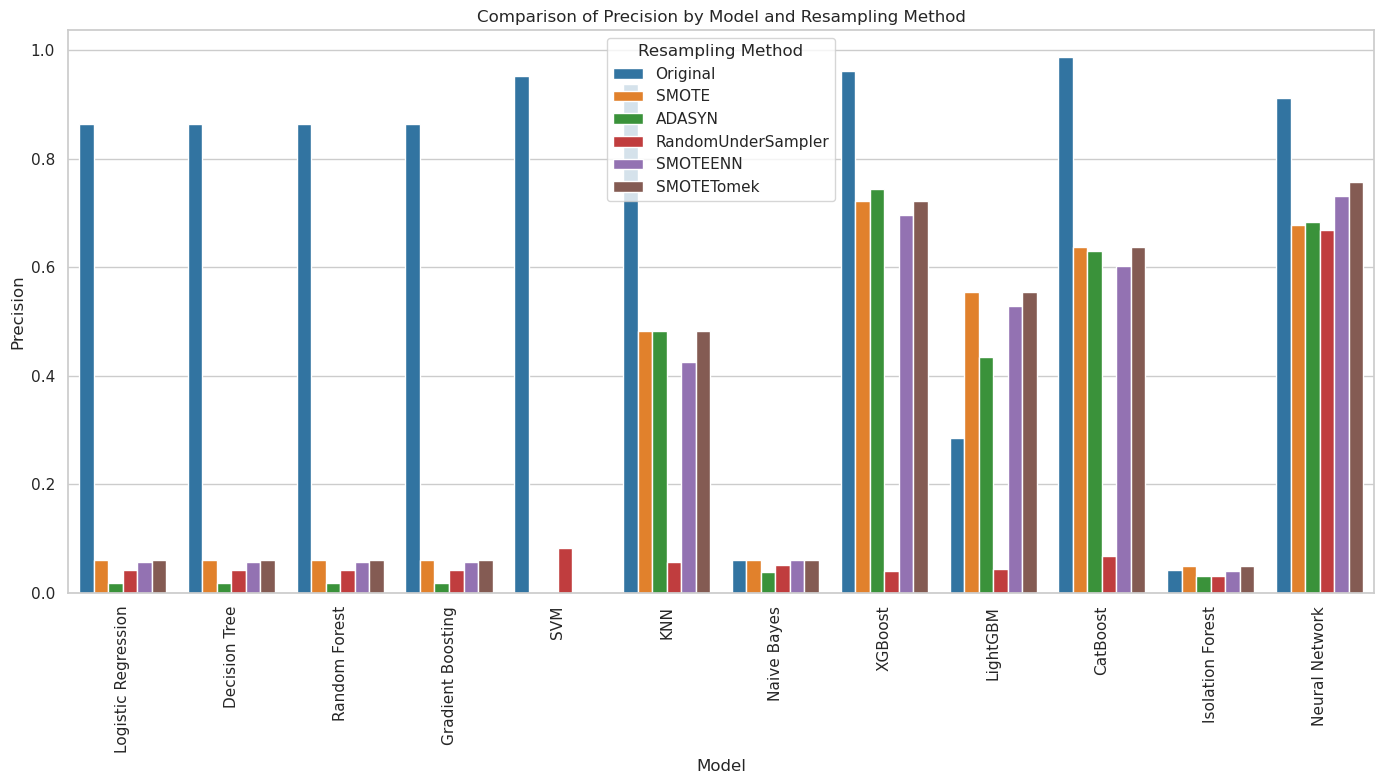

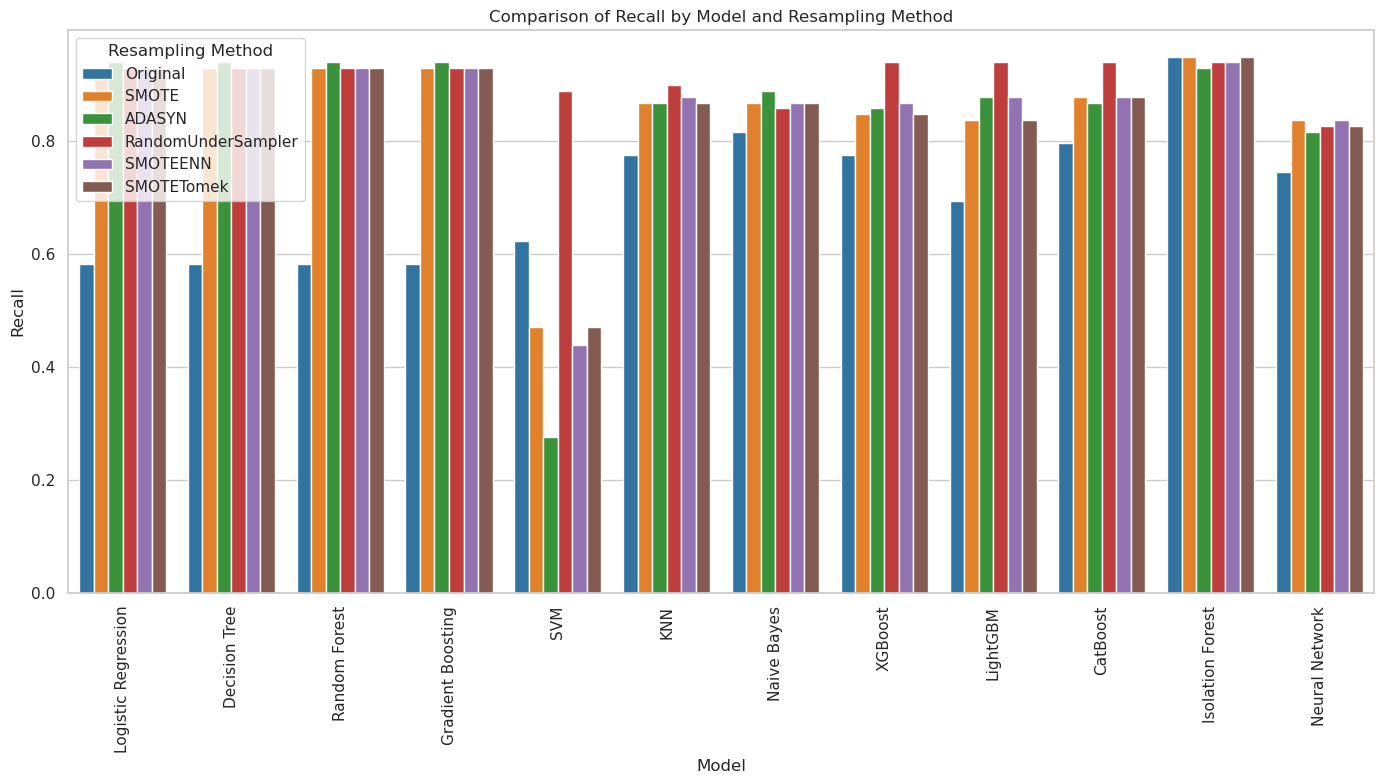

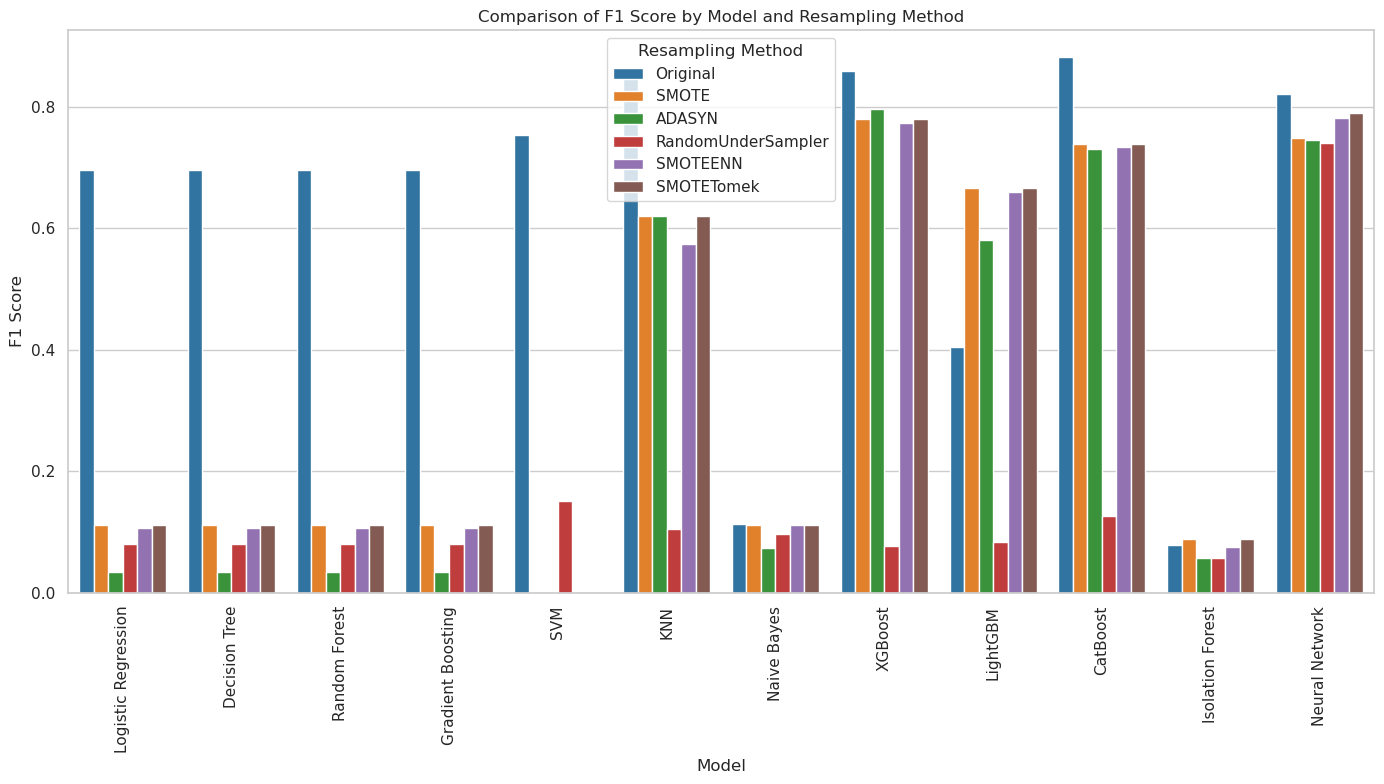

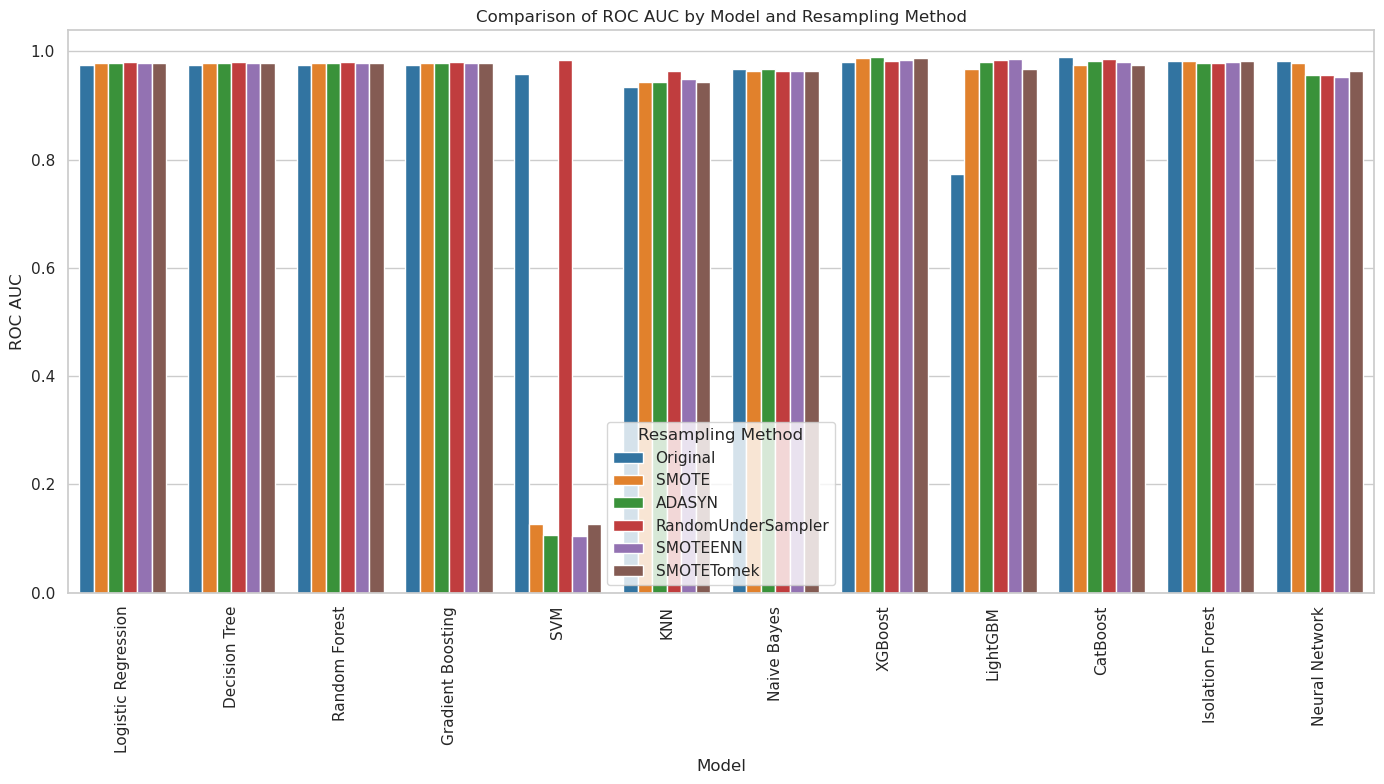

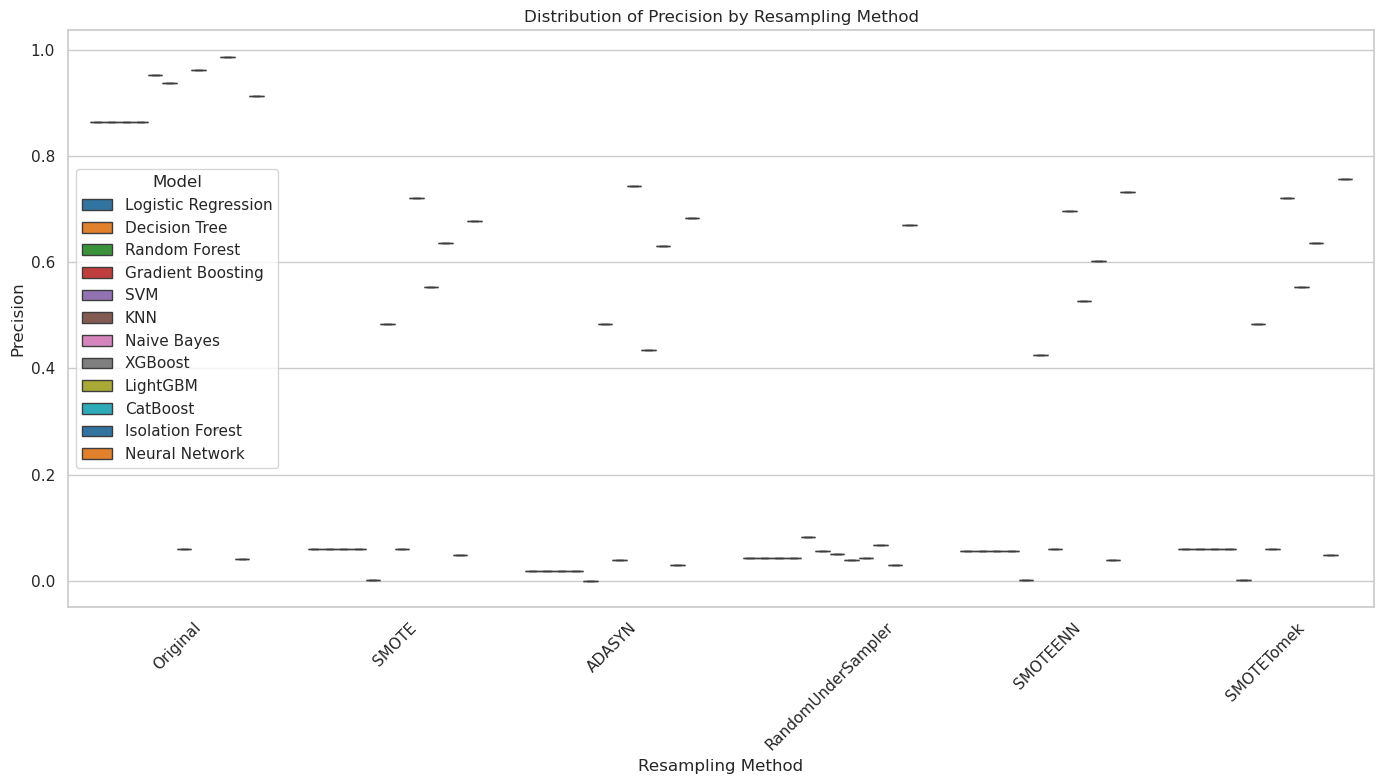

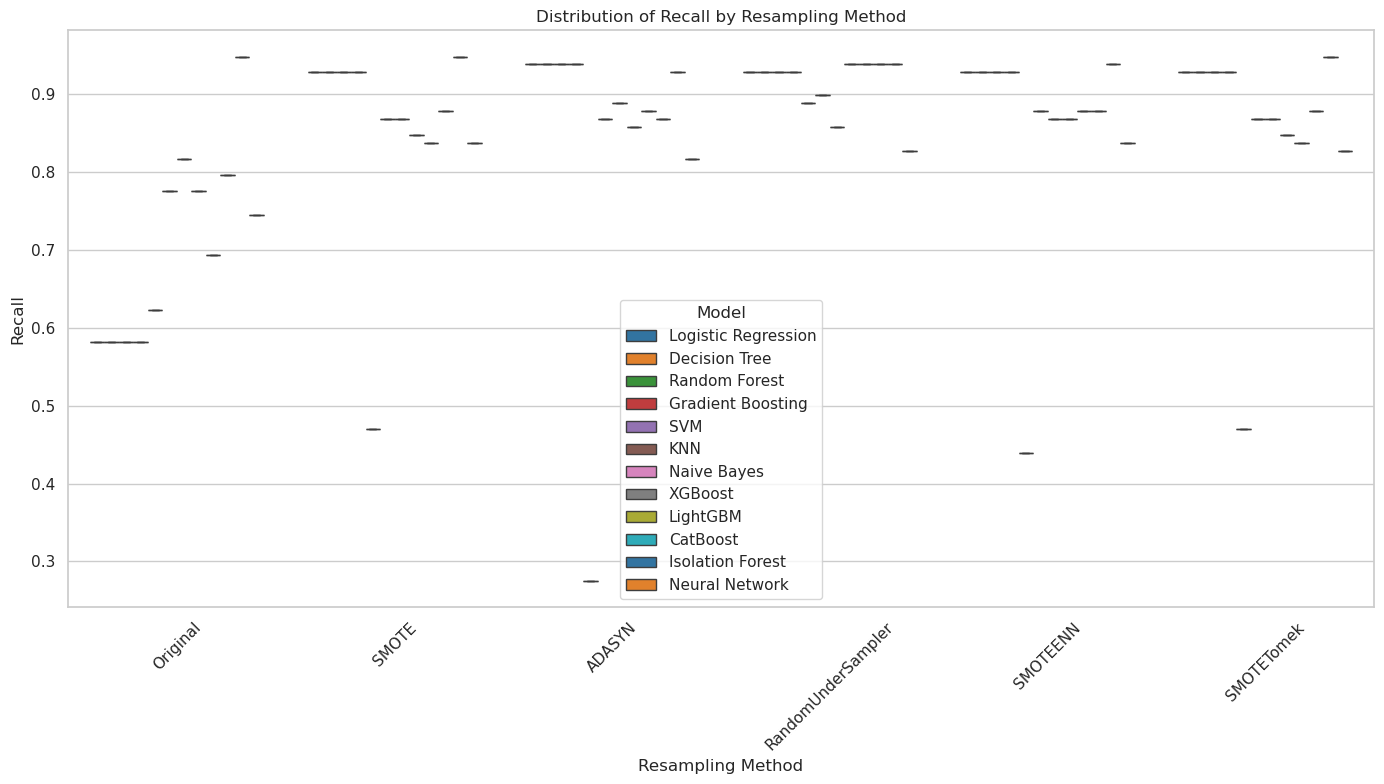

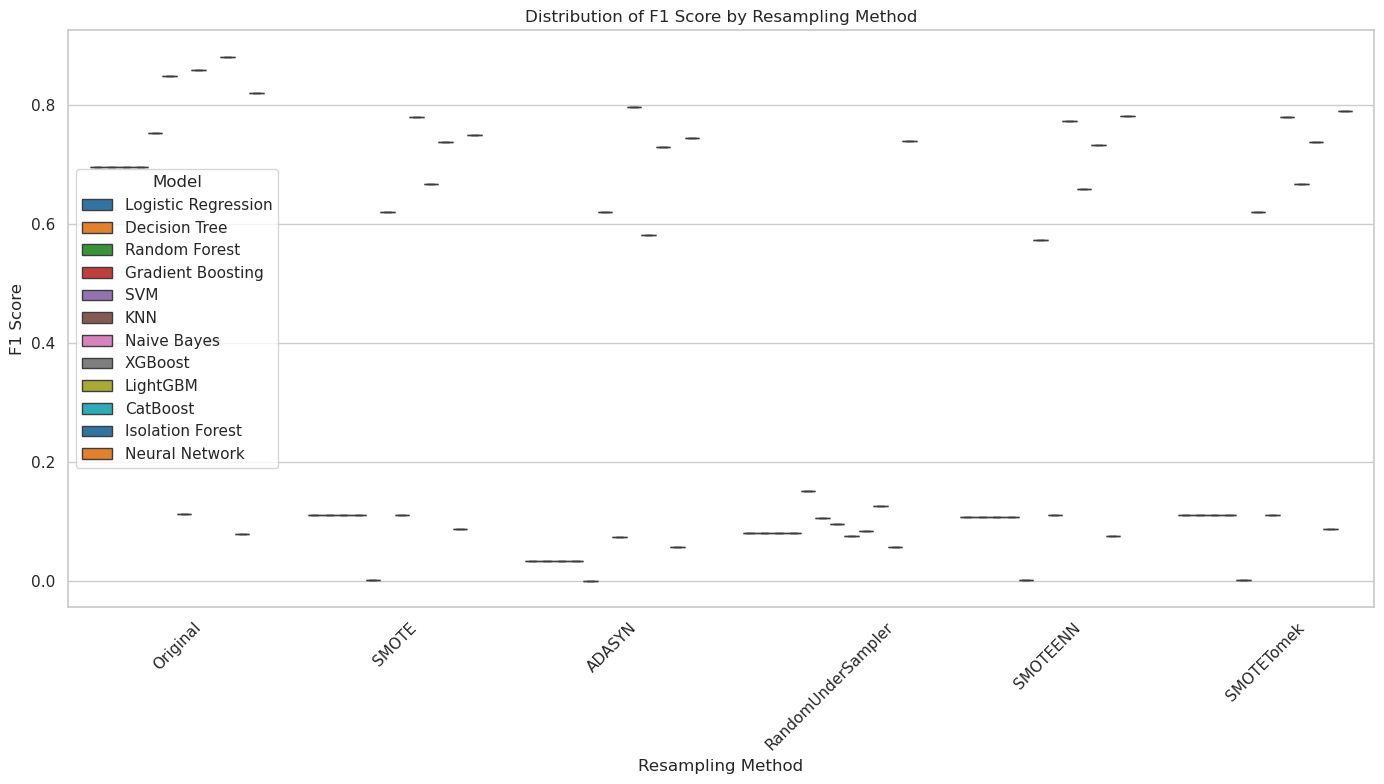

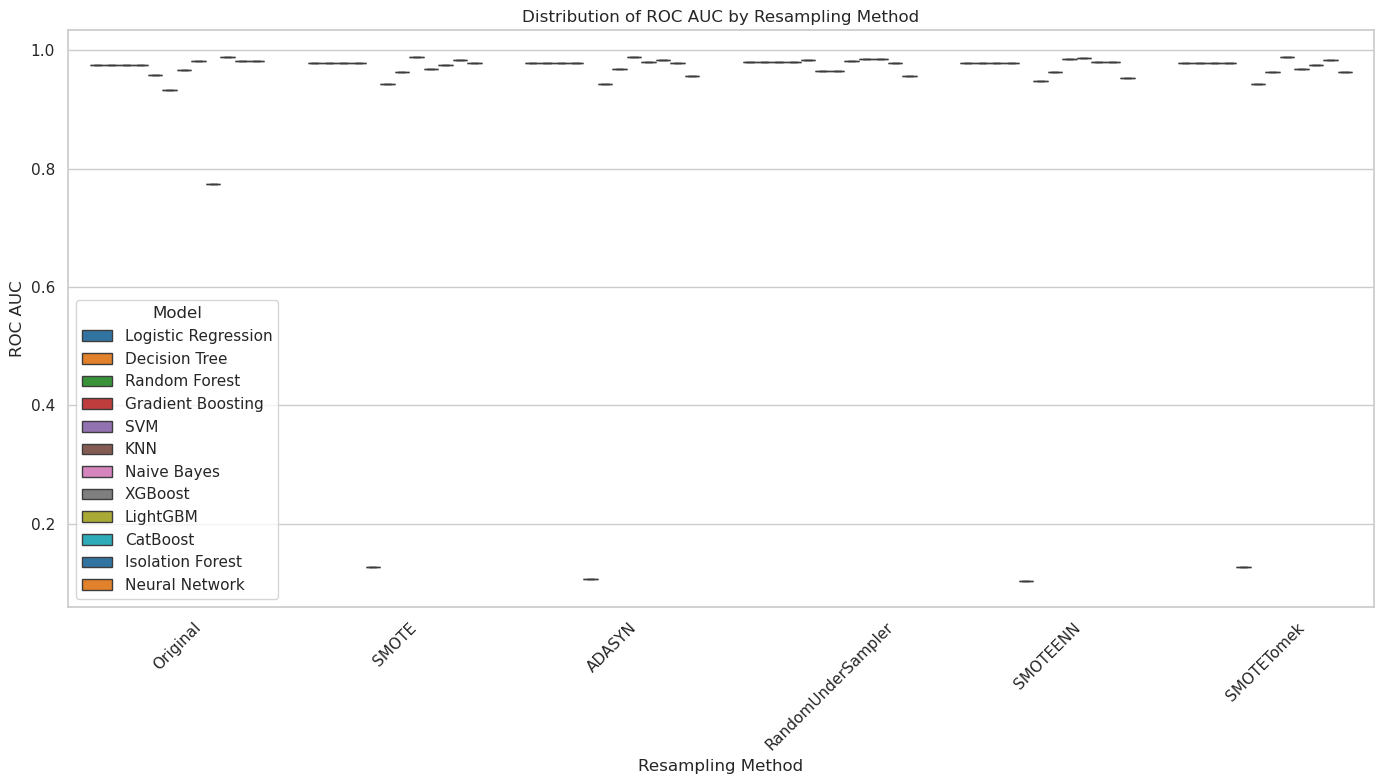

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define results as a dictionary
results = {
    'Model': [],
    'Resampling Method': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Define the list of models and resampling methods
models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting',
    'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'LightGBM', 'CatBoost', 'Isolation Forest',
    'Neural Network'
]

resampling_methods = [
    'Original', 'SMOTE', 'ADASYN', 'RandomUnderSampler', 'SMOTEENN', 'SMOTETomek'
]

# Define results for each model
model_results = {
    'Logistic Regression': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'Decision Tree': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'Random Forest': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'Gradient Boosting': {
        'Original': (0.8636, 0.5816, 0.6951, 0.9749),
        'SMOTE': (0.0593, 0.9286, 0.1115, 0.9787),
        'ADASYN': (0.0177, 0.9388, 0.0347, 0.9777),
        'RandomUnderSampler': (0.0421, 0.9286, 0.0805, 0.9795),
        'SMOTEENN': (0.0568, 0.9286, 0.1070, 0.9785),
        'SMOTETomek': (0.0593, 0.9286, 0.1115, 0.9787)
    },
    'SVM': {
        'Original': (0.9531, 0.6224, 0.7531, 0.9574),
        'SMOTE': (0.0008, 0.4694, 0.0016, 0.1274),
        'ADASYN': (0.0005, 0.2755, 0.0010, 0.1058),
        'RandomUnderSampler': (0.0827, 0.8878, 0.1513, 0.9840),
        'SMOTEENN': (0.0008, 0.4388, 0.0015, 0.1039),
        'SMOTETomek': (0.0008, 0.4694, 0.0016, 0.1274)
    },
    'KNN': {
        'Original': (0.9383, 0.7755, 0.8492, 0.9336),
        'SMOTE': (0.4830, 0.8673, 0.6204, 0.9434),
        'ADASYN': (0.4830, 0.8673, 0.6204, 0.9434),
        'RandomUnderSampler': (0.0559, 0.8980, 0.1053, 0.9645),
        'SMOTEENN': (0.4257, 0.8776, 0.5733, 0.9484),
        'SMOTETomek': (0.4830, 0.8673, 0.6204, 0.9434)
    },
    'Naive Bayes': {
        'Original': (0.0604, 0.8163, 0.1124, 0.9670),
        'SMOTE': (0.0596, 0.8673, 0.1115, 0.9629),
        'ADASYN': (0.0385, 0.8878, 0.0739, 0.9680),
        'RandomUnderSampler': (0.0512, 0.8571, 0.0966, 0.9642),
        'SMOTEENN': (0.0593, 0.8673, 0.1110, 0.9629),
        'SMOTETomek': (0.0596, 0.8673, 0.1115, 0.9629)
    },
    'XGBoost': {
        'Original': (0.9620, 0.7755, 0.8588, 0.9811),
        'SMOTE': (0.7217, 0.8469, 0.7793, 0.9883),
        'ADASYN': (0.7434, 0.8571, 0.7962, 0.9887),
        'RandomUnderSampler': (0.0399, 0.9388, 0.0766, 0.9825),
        'SMOTEENN': (0.6967, 0.8673, 0.7727, 0.9847),
        'SMOTETomek': (0.7217, 0.8469, 0.7793, 0.9883)
    },
    'LightGBM': {
        'Original': (0.2857, 0.6939, 0.4048, 0.7736),
        'SMOTE': (0.5541, 0.8367, 0.6667, 0.9675),
        'ADASYN': (0.4343, 0.8776, 0.5811, 0.9803),
        'RandomUnderSampler': (0.0437, 0.9388, 0.0836, 0.9846),
        'SMOTEENN': (0.5276, 0.8776, 0.6590, 0.9863),
        'SMOTETomek': (0.5541, 0.8367, 0.6667, 0.9675)
    },
    'CatBoost': {
        'Original': (0.9873, 0.7959, 0.8814, 0.9893),
        'SMOTE': (0.6370, 0.8776, 0.7382, 0.9753),
        'ADASYN': (0.6296, 0.8673, 0.7296, 0.9827),
        'RandomUnderSampler': (0.0673, 0.9388, 0.1256, 0.9854),
        'SMOTEENN': (0.6031, 0.8776, 0.7330, 0.9797),
        'SMOTETomek': (0.6370, 0.8776, 0.7382, 0.9753)
    },
    'Isolation Forest': {
        'Original': (0.0410, 0.9480, 0.0785, 0.9826),
        'SMOTE': (0.0485, 0.9480, 0.0882, 0.9829),
        'ADASYN': (0.0298, 0.9286, 0.0577, 0.9783),
        'RandomUnderSampler': (0.0300, 0.9388, 0.0576, 0.9782),
        'SMOTEENN': (0.0395, 0.9388, 0.0755, 0.9806),
        'SMOTETomek': (0.0485, 0.9480, 0.0882, 0.9829)
    },
    'Neural Network': {
        'Original': (0.9125, 0.7449, 0.8202, 0.9812),
        'SMOTE': (0.6777, 0.8367, 0.7489, 0.9781),
        'ADASYN': (0.6838, 0.8163, 0.7442, 0.9564),
        'RandomUnderSampler': (0.6694, 0.8265, 0.7397, 0.9561),
        'SMOTEENN': (0.7321, 0.8367, 0.7810, 0.9527),
        'SMOTETomek': (0.7570, 0.8265, 0.7902, 0.9633)
    }
}

# Populate the results dictionary
for model in models:
    for resampling in resampling_methods:
        precision, recall, f1_score, roc_auc = model_results[model].get(resampling, (None, None, None, None))
        results['Model'].append(model)
        results['Resampling Method'].append(resampling)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1_score)
        results['ROC AUC'].append(roc_auc)

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Set up the plotting environment
sns.set(style="whitegrid")

# Create a bar plot for each metric by model
metrics = ['Precision', 'Recall', 'F1 Score', 'ROC AUC']
for metric in metrics:
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_results, x='Model', y=metric, hue='Resampling Method', palette='tab10')
    plt.title(f'Comparison of {metric} by Model and Resampling Method')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Create a box plot for each metric by resampling method
for metric in metrics:
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_results, x='Resampling Method', y=metric, hue='Model', palette='tab10')
    plt.title(f'Distribution of {metric} by Resampling Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
!pip install imblearn


  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)


  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)






Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)

Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)





[notice] A new release of pip is available: 24.0 -> 24.2

[notice] To update, run: pip install --upgrade pip


## META LEARNING

In [ ]:
!pip install tqdm
!pip install seaborn
!pip install torch torchvision





[notice] A new release of pip is available: 24.0 -> 24.2

[notice] To update, run: pip install --upgrade pip


















[notice] A new release of pip is available: 24.0 -> 24.2

[notice] To update, run: pip install --upgrade pip
































[notice] A new release of pip is available: 24.0 -> 24.2

[notice] To update, run: pip install --upgrade pip


**Reproducing past research work on our present dataset  and learning the structure of meta learning model**

Fraud Ratio Loop:   0%|          | 0/4 [00:00<?, ?it/s]

50% Fraud Ratio:   0%|          | 0/4 [00:00<?, ?it/s]/tmp/ipykernel_95/1305876963.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

  results_df = pd.concat([results_df, pd.DataFrame({



50% Fraud Ratio:  50%|█████     | 2/4 [00:00<00:00, 17.14it/s]

50% Fraud Ratio: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                                                              /tmp/ipykernel_95/1305876963.py:91: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the 

    Fraud_Ratio                 Model  Accuracy  Precision    Recall  \

0          0.50   ID3 (Decision Tree)  0.907201   0.016045  0.877551   

1          0.50  CART (Decision Tree)  0.902549   0.016321  0.938776   

2          0.50         Random Forest  0.967768   0.047867  0.938776   

3          0.50           Naive Bayes  0.984024   0.074423  0.724490   

4          0.33   ID3 (Decision Tree)  0.939556   0.024993  0.897959   

5          0.33  CART (Decision Tree)  0.943734   0.027668  0.928571   

6          0.33         Random Forest  0.994224   0.216216  0.897959   

7          0.33           Naive Bayes  0.989993   0.113115  0.704082   

8          0.25   ID3 (Decision Tree)  0.960377   0.038083  0.908163   

9          0.25  CART (Decision Tree)  0.955233   0.034195  0.918367   

10         0.25         Random Forest  0.996261   0.299652  0.877551   

11         0.25           Naive Bayes  0.989344   0.106646  0.704082   

12         0.20   ID3 (Decision Tree)  0.969260   0

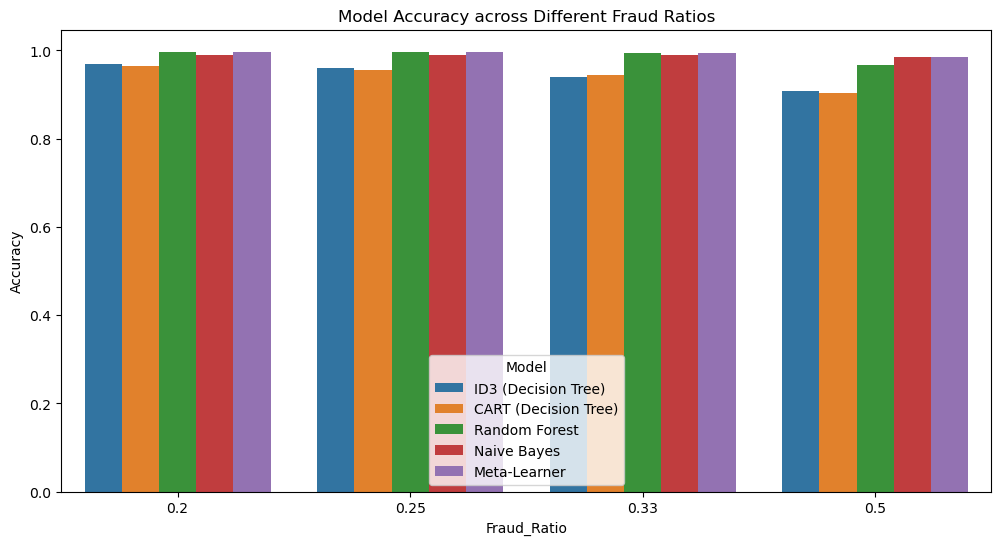

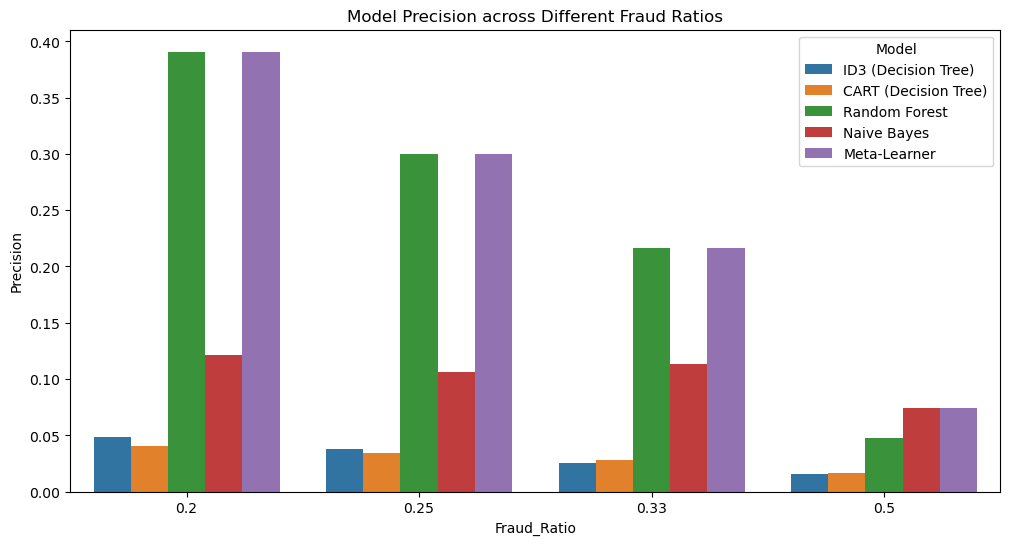

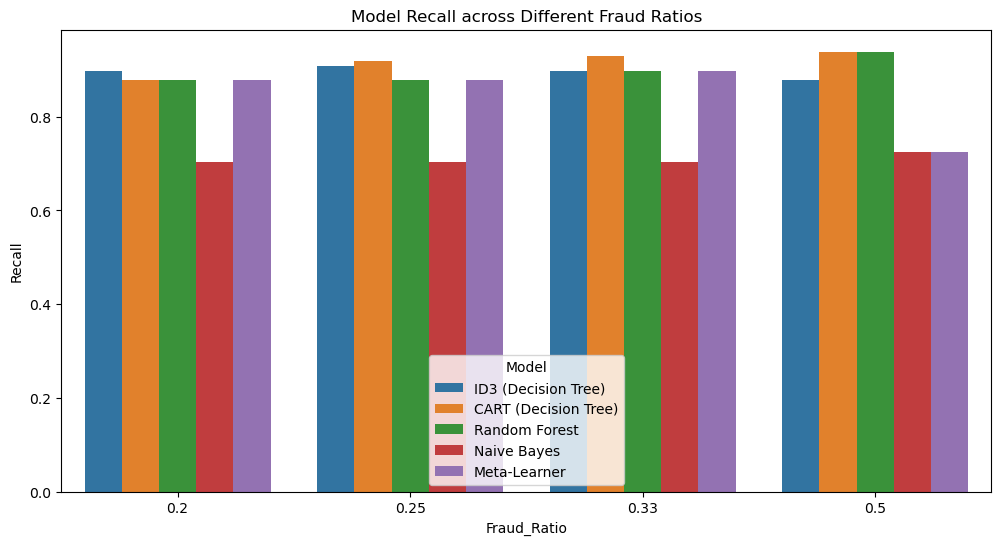

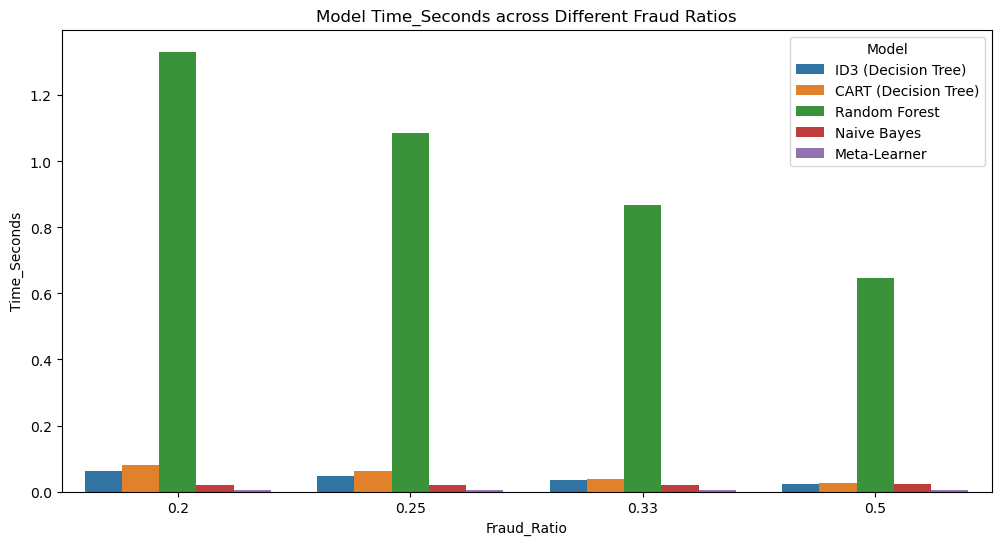

In [ ]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard 5.csv')

# Prepare the data
X = data.drop(columns=['Class'])
y = data['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to balance the dataset with a specified fraud ratio
def balance_data(X, y, fraud_ratio):
    fraud = X[y == 1]
    non_fraud = X[y == 0]
    n_fraud = len(fraud)
    n_non_fraud = int(n_fraud / fraud_ratio * (1 - fraud_ratio))
    non_fraud_downsampled = resample(non_fraud, replace=False, n_samples=n_non_fraud, random_state=42)
    balanced_X = pd.concat([fraud, non_fraud_downsampled])
    balanced_y = pd.concat([y[y == 1], y[non_fraud_downsampled.index]])
    return balanced_X, balanced_y

# Initialize results DataFrame
results_df = pd.DataFrame(columns=['Fraud_Ratio', 'Model', 'Accuracy', 'Precision', 'Recall', 'Time_Seconds'])

# Define models and fraud ratios
fraud_ratios = [0.5, 0.33, 0.25, 0.2]
models = {
    'ID3 (Decision Tree)': DecisionTreeClassifier(criterion='entropy'),
    'CART (Decision Tree)': DecisionTreeClassifier(criterion='gini'),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

meta_results = pd.DataFrame(columns=['Fraud_Ratio', 'Accuracy', 'Precision', 'Recall', 'Time_Seconds'])

# Train models and store results
for ratio in tqdm(fraud_ratios, desc="Fraud Ratio Loop"):
    X_balanced, y_balanced = balance_data(X_train, y_train, ratio)
    best_model_name = None
    best_accuracy = 0
    best_predictions = None

    # Train each model and find the best model for this fraud ratio
    for model_name, model in tqdm(models.items(), desc=f"{int(ratio*100)}% Fraud Ratio", leave=False):
        start_time = time.time()
        model.fit(X_balanced, y_balanced)
        y_pred = model.predict(X_test)
        duration = time.time() - start_time

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Store the results for each model
        results_df = pd.concat([results_df, pd.DataFrame({
            'Fraud_Ratio': [ratio],
            'Model': [model_name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'Time_Seconds': [duration]
        })], ignore_index=True)

        # Track the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_predictions = y_pred

    # Train the meta-learner using the best model's predictions
    meta_learner = GaussianNB()
    start_time = time.time()
    meta_learner.fit(np.expand_dims(best_predictions, axis=1), y_test)
    meta_y_pred = meta_learner.predict(np.expand_dims(best_predictions, axis=1))
    duration = time.time() - start_time

    # Store the meta-learner's results
    meta_results = pd.concat([meta_results, pd.DataFrame({
        'Fraud_Ratio': [ratio],
        'Accuracy': [accuracy_score(y_test, meta_y_pred)],
        'Precision': [precision_score(y_test, meta_y_pred)],
        'Recall': [recall_score(y_test, meta_y_pred)],
        'Time_Seconds': [duration]
    })], ignore_index=True)

# Combine the results for visualization
combined_results = pd.concat([
    results_df,
    meta_results.assign(Model='Meta-Learner')
], ignore_index=True)

# Display the final results
print(combined_results)

# Plotting function
def plot_metric(metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Fraud_Ratio', y=metric, hue='Model', data=combined_results)
    plt.title(f'Model {metric} across Different Fraud Ratios')
    plt.show()

# Plot accuracy, precision, recall, and time
for metric in ['Accuracy', 'Precision', 'Recall', 'Time_Seconds']:
    plot_metric(metric)


balancing the dataset by downsampling the non fraud to the fraud ratio.
the base models are trained on this balanced dataset
the best prediction is taken into consideration.
the metalearner (Gaussian NB) is trained on this best predicted output to enhance the prediction

## Implememnting the same architecture on different sets of base learners ( LR,DT,RF,GB,KNN,NB,MLP)

50% Fraud Ratio:   0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-4-1f19b2febaf3>:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({

Fraud Ratio Loop: 100%|██████████| 4/4 [3:09:58<00:00, 2849.53s/it]


    Fraud_Ratio         Model  Precision    Recall  F1_Score   ROC_AUC  \
0          0.50        logreg   0.863118  0.600529  0.708268  0.978582   
1          0.50            dt   0.757412  0.743386  0.750334  0.871495   
2          0.50            rf   0.942122  0.775132  0.850508  0.938830   
3          0.50            gb   0.816239  0.505291  0.624183  0.642204   
4          0.50           knn   0.944882  0.634921  0.759494  0.874190   
5          0.50            nb   0.059406  0.825397  0.110835  0.962272   
6          0.50           mlp   0.914826  0.767196  0.834532  0.976930   
7          0.50  Meta-Learner   0.878151  0.552910  0.678571  0.978582   
8          0.33        logreg   0.860902  0.605820  0.711180  0.978065   
9          0.33            dt   0.757412  0.743386  0.750334  0.871495   
10         0.33            rf   0.942122  0.775132  0.850508  0.938830   
11         0.33            gb   0.816239  0.505291  0.624183  0.642204   
12         0.33           knn   0.9343

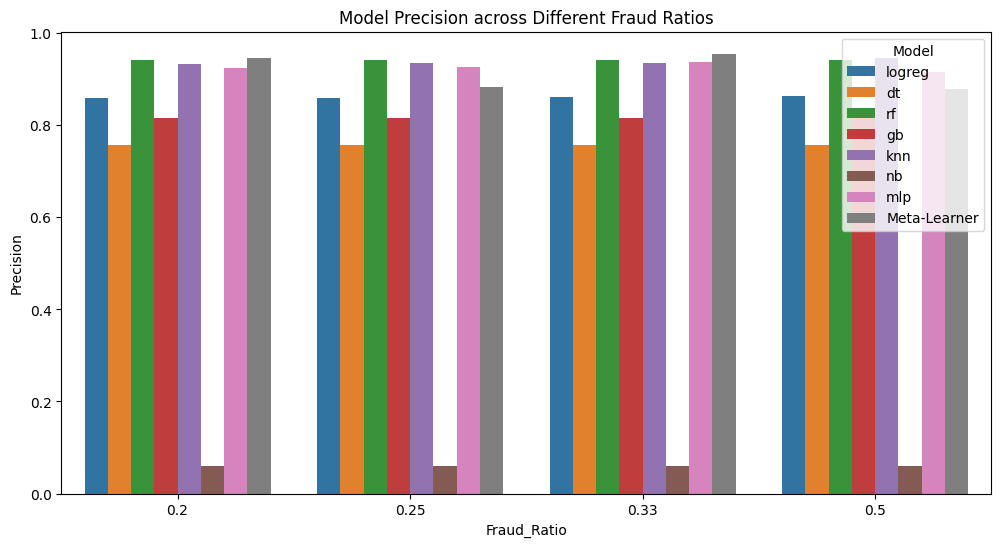

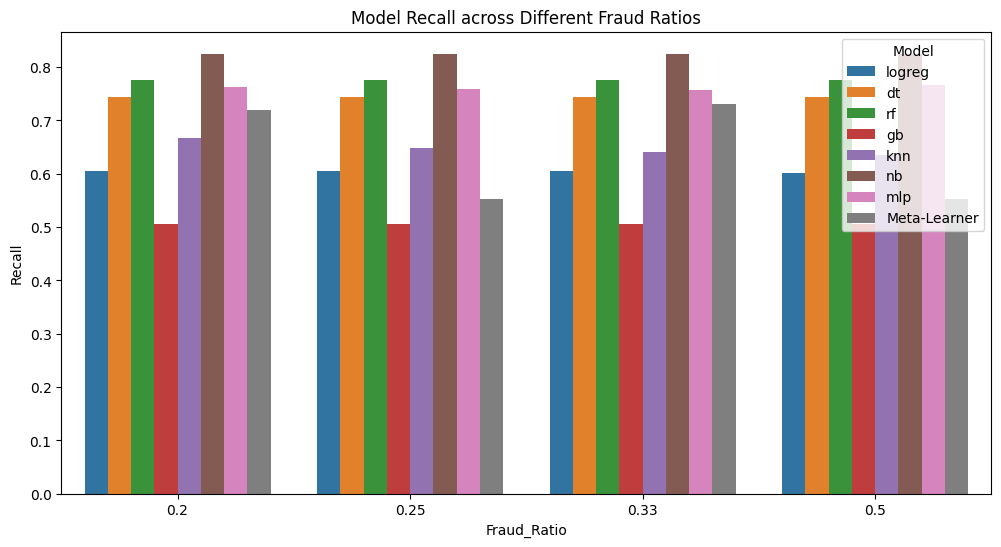

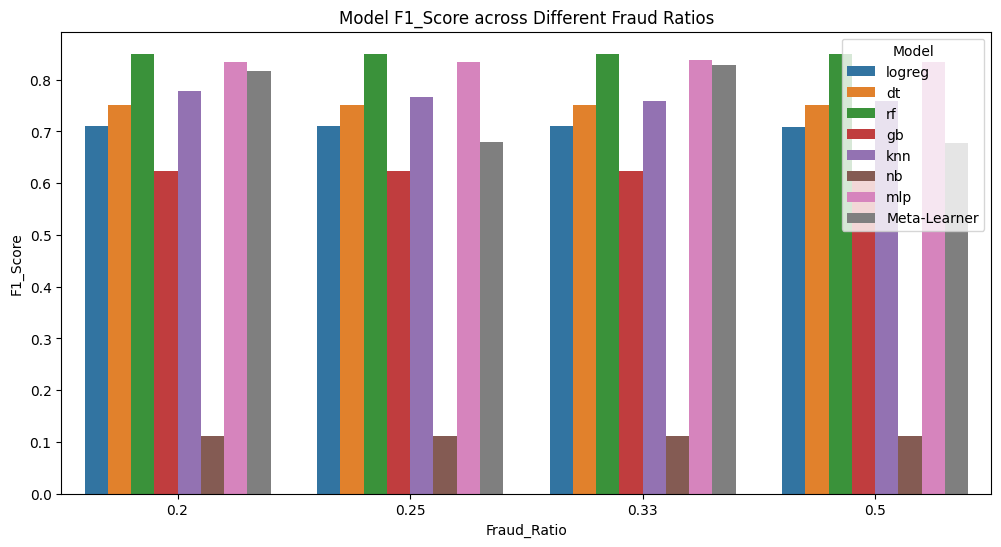

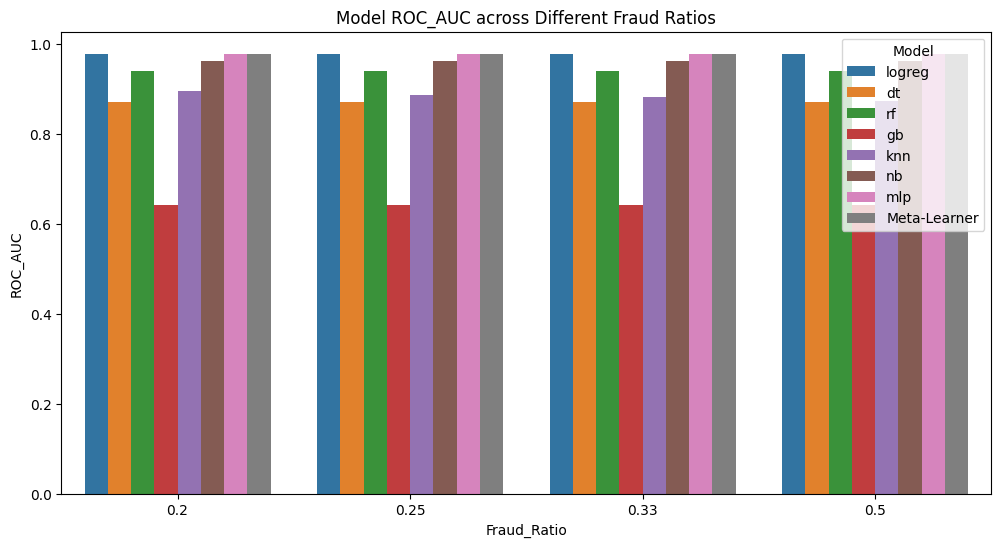

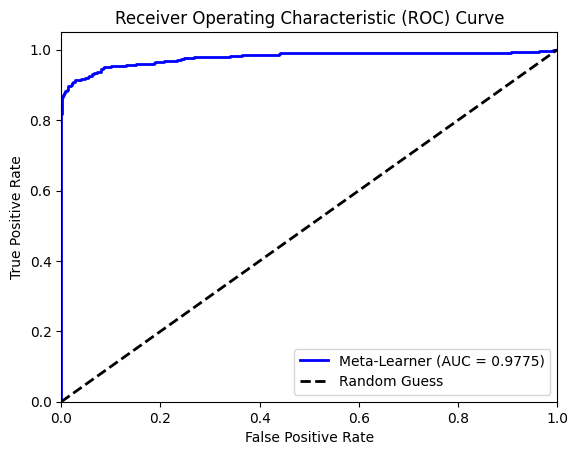


Models and scaler saved to /content/drive/MyDrive/ECC/metapred_iii_models/


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import os
from tqdm import tqdm

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ECC/european_cardholder_train_processed.csv')

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Define models and fraud ratios
fraud_ratios = [0.5, 0.33, 0.25, 0.2]
base_models = [
    ('logreg', LogisticRegression(random_state=42, max_iter=2000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
    ('mlp', MLPClassifier(random_state=42, max_iter=2000))
]

# Initialize results DataFrame
results_df = pd.DataFrame(columns=['Fraud_Ratio', 'Model', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC', 'Time_Seconds'])

# Function to balance the dataset with a specified fraud ratio
def balance_data(X, y, fraud_ratio):
    fraud = X[y == 1]
    non_fraud = X[y == 0]
    n_fraud = len(fraud)
    n_non_fraud = int(n_fraud / fraud_ratio * (1 - fraud_ratio))
    non_fraud_downsampled = resample(non_fraud, replace=False, n_samples=n_non_fraud, random_state=42)
    balanced_X = pd.concat([fraud, non_fraud_downsampled])
    balanced_y = pd.concat([y[y == 1], y[non_fraud_downsampled.index]])
    return balanced_X, balanced_y

# Scale features
scaler = StandardScaler()

# Train models and store results
for ratio in tqdm(fraud_ratios, desc="Fraud Ratio Loop"):
    X_balanced, y_balanced = balance_data(X, y, ratio)
    X_balanced_scaled = scaler.fit_transform(X_balanced)

    best_model_name = None
    best_roc_auc = 0
    best_predictions = None

    # Train each model and find the best model for this fraud ratio
    for model_name, model in tqdm(base_models, desc=f"{int(ratio*100)}% Fraud Ratio", leave=False):
        start_time = time.time()
        model.fit(X_balanced_scaled, y_balanced)
        y_pred_proba = cross_val_predict(model, scaler.transform(X), y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), method='predict_proba')[:, 1]
        duration = time.time() - start_time

        precision = precision_score(y, (y_pred_proba > 0.5).astype(int))
        recall = recall_score(y, (y_pred_proba > 0.5).astype(int))
        f1 = f1_score(y, (y_pred_proba > 0.5).astype(int))
        roc_auc = roc_auc_score(y, y_pred_proba)

        # Store the results for each model
        results_df = pd.concat([results_df, pd.DataFrame({
            'Fraud_Ratio': [ratio],
            'Model': [model_name],
            'Precision': [precision],
            'Recall': [recall],
            'F1_Score': [f1],
            'ROC_AUC': [roc_auc],
            'Time_Seconds': [duration]
        })], ignore_index=True)

        # Track the best model based on ROC AUC
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_model_name = model_name
            best_predictions = y_pred_proba

    # Train the meta-learner using the best model's predictions
    meta_learner = LogisticRegression(random_state=42, max_iter=2000)
    start_time = time.time()
    meta_learner.fit(np.expand_dims(best_predictions, axis=1), y)
    meta_y_pred_proba = meta_learner.predict_proba(np.expand_dims(best_predictions, axis=1))[:, 1]
    duration = time.time() - start_time

    # Store the meta-learner's results
    results_df = pd.concat([results_df, pd.DataFrame({
        'Fraud_Ratio': [ratio],
        'Model': ['Meta-Learner'],
        'Precision': [precision_score(y, (meta_y_pred_proba > 0.5).astype(int))],
        'Recall': [recall_score(y, (meta_y_pred_proba > 0.5).astype(int))],
        'F1_Score': [f1_score(y, (meta_y_pred_proba > 0.5).astype(int))],
        'ROC_AUC': [roc_auc_score(y, meta_y_pred_proba)],
        'Time_Seconds': [duration]
    })], ignore_index=True)

# Display the final results
print(results_df)

# Plotting function
def plot_metric(metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Fraud_Ratio', y=metric, hue='Model', data=results_df)
    plt.title(f'Model {metric} across Different Fraud Ratios')
    plt.show()

# Plot precision, recall, F1 score, and ROC AUC
for metric in ['Precision', 'Recall', 'F1_Score', 'ROC_AUC']:
    plot_metric(metric)

# Plotting the ROC curve for the meta-learner
fpr, tpr, _ = roc_curve(y, meta_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Meta-Learner (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Saving the models and scaler
model_dir = '/content/drive/MyDrive/ECC/metapred_iii_models/'
os.makedirs(model_dir, exist_ok=True)

for name, model in base_models:
    model.fit(scaler.transform(X), y)  # Re-train on the entire dataset
    joblib.dump(model, f'{model_dir}{name}_model.joblib')

# Saving the meta-learner and scaler
joblib.dump(meta_learner, f'{model_dir}meta_learner_model.joblib')
joblib.dump(scaler, f'{model_dir}scaler.joblib')

print(f"\nModels and scaler saved to {model_dir}")


In [ ]:
!pip install catboost






















   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00




##MetaPred I##


In [2]:
pip install pandas numpy scikit-learn xgboost lightgbm catboost tqdm joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 12.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" 

**Data Preprocessing and Splitting the dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/drive/MyDrive/european_cardholder.csv')


df = df.drop_duplicates()


X = df.drop('Class', axis=1)
y = df['Class']

# Spliting the dataset to 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Checking for overlapping features
overlap = pd.merge(train_df, test_df, how='inner')
if not overlap.empty:
    print(f"Overlapping rows found: {len(overlap)} rows. Removing overlaps from the training set.")
    train_df = pd.concat([train_df, overlap]).drop_duplicates(keep=False)

# Saving the two processed dataset
train_df.to_csv('/content/drive/MyDrive/ECC/european_cardholder_train_processed.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/ECC/european_cardholder_test_processed.csv', index=False)

print("Data preprocessing completed. Processed datasets saved.")


Data preprocessing completed. Processed datasets saved.


**Checking if data preprocessing is done correctly**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


train_df = pd.read_csv('/content/drive/MyDrive/ECC/european_cardholder_train_processed.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ECC/european_cardholder_test_processed.csv')

# 1.  missing values
print("Checking for missing values...")
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
print(f"Missing values in train data:\n{missing_train}")
print(f"Missing values in test data:\n{missing_test}")

# 2. duplicated rows
print("Checking for duplicated rows...")
duplicates_train = train_df.duplicated().sum()
duplicates_test = test_df.duplicated().sum()
print(f"Duplicated rows in train data: {duplicates_train}")
print(f"Duplicated rows in test data: {duplicates_test}")

# 3. Train Test should have the same feature
print("Checking that train and test sets have the same features...")
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)
print(f"Train columns: {train_columns}")
print(f"Test columns: {test_columns}")
if train_columns == test_columns:
    print("Feature columns match between train and test sets.")
else:
    print("Feature columns do not match between train and test sets!")

# 4. Checking feature scaling consistency
scaler = StandardScaler()
X_train = train_df.drop('Class', axis=1)
X_test = test_df.drop('Class', axis=1)
y_train = train_df['Class']
y_test = test_df['Class']

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_mean = np.mean(X_train_scaled, axis=0)
train_std = np.std(X_train_scaled, axis=0)
test_mean = np.mean(X_test_scaled, axis=0)
test_std = np.std(X_test_scaled, axis=0)

print("Checking feature scaling consistency...")
print(f"Train data mean after scaling (should be close to 0): {train_mean}")
print(f"Train data std after scaling (should be close to 1): {train_std}")
print(f"Test data mean after scaling (should be close to 0): {test_mean}")
print(f"Test data std after scaling (should be close to 1): {test_std}")

# 5. Checking for data leakage
print("Checking for data leakage...")
original_train_shape = train_df.shape
original_test_shape = test_df.shape
overlap = pd.merge(train_df, test_df, how='inner')
print(f"Original train shape: {original_train_shape}")
print(f"Original test shape: {original_test_shape}")
print(f"Overlap between train and test sets: {len(overlap)} rows")

if len(overlap) > 0:
    print("Warning: There is overlap between train and test sets!")
else:
    print("No data leakage detected.")

print("Data preprocessing checks completed.")


Checking for missing values...
Missing values in train data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Missing values in test data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Checking for duplicated rows...
Duplicated rows in train data: 0
Duplicated rows in test data: 0
Checking that train and test sets have the 

**Training**

Generating meta-features for logreg...
Generating meta-features for dt...
Generating meta-features for rf...
Generating meta-features for gb...
Generating meta-features for knn...
Generating meta-features for nb...
Generating meta-features for mlp...

Training Set Evaluation Metrics:
Training Precision: 0.9487
Training Recall: 0.7789
Training F1 Score: 0.8555
Training ROC AUC: 0.9767

Validation Set Evaluation Metrics:
Validation Precision: 0.9281
Validation Recall: 0.7553
Validation F1 Score: 0.8328
Validation ROC AUC: 0.9728


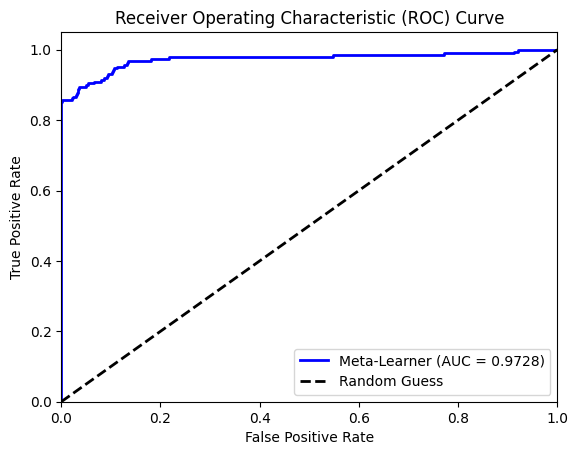


Models and scaler saved to /content/drive/MyDrive/ECC/metapred_models/


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import joblib
import os

# Loading the preprocessed training data
train_df = pd.read_csv('/content/drive/MyDrive/ECC/european_cardholder_train_processed.csv')

# Separating features and target
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# base models
base_models = [
    ('logreg', LogisticRegression(random_state=42, max_iter=2000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
    ('mlp', MLPClassifier(random_state=42, max_iter=2000))
]

# StratifiedKFold to maintain consistent class distribution across folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initializing the meta-features for training the meta-learner
meta_features_train = np.zeros((X_train_scaled.shape[0], len(base_models)))

# Generating meta-features using cross-validation
for i, (name, model) in enumerate(base_models):
    print(f"Generating meta-features for {name}...")
    meta_features_train[:, i] = cross_val_predict(model, X_train_scaled, y_train, cv=skf, method='predict_proba')[:, 1]

#  meta_features_train and y_train should have the same shape
assert meta_features_train.shape[0] == y_train.shape[0]

# Train-test split for meta-learner
X_train_meta, X_valid_meta, y_train_meta, y_valid_meta = train_test_split(
    meta_features_train, y_train, test_size=0.5, random_state=42
)

# Defining  and training the meta-learner
meta_learner = LogisticRegression(random_state=42, max_iter=2000)
meta_learner.fit(X_train_meta, y_train_meta)

# Evaluating the meta-learner on both training and validation sets
y_train_pred = meta_learner.predict(X_train_meta)
y_valid_pred = meta_learner.predict(X_valid_meta)

y_train_pred_proba = meta_learner.predict_proba(X_train_meta)[:, 1]
y_valid_pred_proba = meta_learner.predict_proba(X_valid_meta)[:, 1]

train_precision = precision_score(y_train_meta, y_train_pred)
train_recall = recall_score(y_train_meta, y_train_pred)
train_f1 = f1_score(y_train_meta, y_train_pred)
train_roc_auc = roc_auc_score(y_train_meta, y_train_pred_proba)

valid_precision = precision_score(y_valid_meta, y_valid_pred)
valid_recall = recall_score(y_valid_meta, y_valid_pred)
valid_f1 = f1_score(y_valid_meta, y_valid_pred)
valid_roc_auc = roc_auc_score(y_valid_meta, y_valid_pred_proba)

print("\nTraining Set Evaluation Metrics:")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Training ROC AUC: {train_roc_auc:.4f}")

print("\nValidation Set Evaluation Metrics:")
print(f"Validation Precision: {valid_precision:.4f}")
print(f"Validation Recall: {valid_recall:.4f}")
print(f"Validation F1 Score: {valid_f1:.4f}")
print(f"Validation ROC AUC: {valid_roc_auc:.4f}")

# Plotting the ROC curve for the validation set
fpr, tpr, _ = roc_curve(y_valid_meta, y_valid_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Meta-Learner (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Saving the model
model_dir = '/content/drive/MyDrive/ECC/metapred_models/'
os.makedirs(model_dir, exist_ok=True)

# Saving the base models
for name, model in base_models:
    model.fit(X_train_scaled, y_train)  # Re-train on the entire dataset
    joblib.dump(model, f'{model_dir}{name}_model.joblib')

# Saving the meta-learner
joblib.dump(meta_learner, f'{model_dir}meta_learner_model.joblib')

# Saving the scaler
joblib.dump(scaler, f'{model_dir}scaler.joblib')

print(f"\nModels and scaler saved to {model_dir}")


**key points**
as lr , knn , nn are sensitive to scale data , hence I am standardizing the data to have mean 0 and sd 1

to address data imbalance we use stratifiekfold to ensure each fold in cv has the same distribution

Meta-features are calculated by using cross_val_predict to do the cross validation for each of the bases classifiers. The predicted probabilities of the positive class  are fed for training the meta-learner. This step is useful to preserve the differential gains that a number of models have in a new feature space.

**Testing**


Test Set Evaluation Metrics:
Test Precision: 0.9859
Test Recall: 0.7368
Test F1 Score: 0.8434
Test ROC AUC: 0.9691


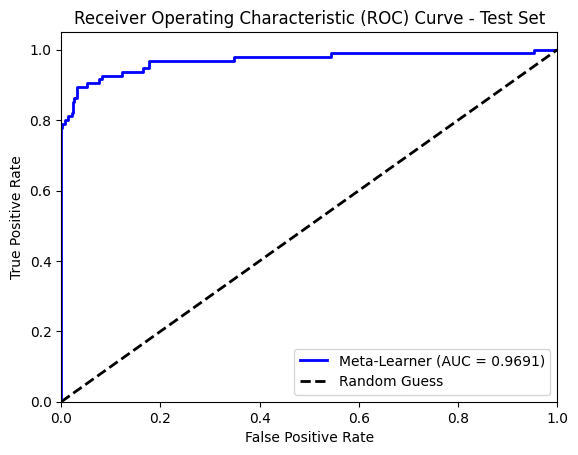

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import joblib


test_df = pd.read_csv('/content/drive/MyDrive/ECC/european_cardholder_test_processed.csv')

# Separating features and target
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

# Loading the saved scaler and models
model_dir = '/content/drive/MyDrive/ECC/metapred_models/'
scaler = joblib.load(f'{model_dir}scaler.joblib')
meta_learner = joblib.load(f'{model_dir}meta_learner_model.joblib')

# Loading the base models
base_models_loaded = {}
for model_name in ['logreg', 'dt', 'rf', 'gb', 'knn', 'nb', 'mlp']:
    base_models_loaded[model_name] = joblib.load(f'{model_dir}{model_name}_model.joblib')

# Scaling the test data
X_test_scaled = scaler.transform(X_test)

# Generating meta-features using the base models which is loaded
meta_features_test = np.zeros((X_test_scaled.shape[0], len(base_models_loaded)))
for i, (name, model) in enumerate(base_models_loaded.items()):
    meta_features_test[:, i] = model.predict_proba(X_test_scaled)[:, 1]

# Predicting  the meta-learner on the test set
y_test_pred = meta_learner.predict(meta_features_test)
y_test_pred_proba = meta_learner.predict_proba(meta_features_test)[:, 1]

# Evaluating the meta-learner on the test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nTest Set Evaluation Metrics:")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Plotting the ROC curve for the test set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Meta-Learner (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!pip install lightgbm


  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl (3.6 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install catboost


  Using cached catboost-1.2.5-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-5.23.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached catboost-1.2.5-cp310-cp310-manylinux2014_x86_64.whl (98.2 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Using cached plotly-5.23.0-py3-none-any.whl (17.3 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install catboost


  Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl (190.9 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl (3.6 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Using cached catboost-1.2.5-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-5.23.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached catboost

In [ ]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 10.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 req

In [ ]:
!pip install lightgbm
!pip install catboost
!pip install imblearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 19.9 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE # Keep this import for SMOTE
from imblearn.combine import SMOTETomek # Import SMOTETomek from the correct module

In [ ]:
!pip uninstall lightgbm
!pip install lightgbm --install-option=--gpu


Found existing installation: lightgbm 4.4.0
Uninstalling lightgbm-4.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/lightgbm-4.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/lightgbm/*
Proceed (Y/n)? Y
  Successfully uninstalled lightgbm-4.4.0

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [ ]:
!pip install lightgbm --install-option=--gpu


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [ ]:
!pip install numpy pandas scikit-learn lightgbm catboost imbalanced-learn tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 24.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import gc

# For LGBMClassifier and CatBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# This will keep the notebook running by simulating activity
import time
from IPython.display import display, Javascript

def keep_alive():
    display(Javascript('function ClickConnect(){console.log("Working");document.querySelector("colab-toolbar-button#connect").click()}setInterval(ClickConnect,60000)'))

keep_alive()


<IPython.core.display.Javascript object>

**To avoid disconnecting runtimes**

##Meta Learning Model 2

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pandas numpy scikit-learn lightgbm catboost xgboost imbalanced-learn tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.2 MB/s eta 0:00:00


##MetaGuard II

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import gc


df = pd.read_csv('fraudTrain.csv')

# Sample a smaller part of data
df = df.sample(frac=0.1, random_state=42)

# Handle datetime columns
if 'DateColumn' in df.columns:
    df['Year'] = pd.to_datetime(df['DateColumn']).dt.year
    df['Month'] = pd.to_datetime(df['DateColumn']).dt.month
    df['Day'] = pd.to_datetime(df['DateColumn']).dt.day
    df['Hour'] = pd.to_datetime(df['DateColumn']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['DateColumn']).dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'] >= 5
    df['Quarter'] = pd.to_datetime(df['DateColumn']).dt.quarter
    df.drop('DateColumn', axis=1, inplace=True)

# Separate features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Handle categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(exclude=['object']).columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ]), categorical_cols)
    ])

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        n_estimators=200,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=3,
        max_features='sqrt'  # Corrected to 'sqrt'
    )),
    ('lgbm', LGBMClassifier(
        random_state=42,
        n_jobs=-1,
        max_depth=8,
        n_estimators=200,
        reg_alpha=0.3,
        reg_lambda=0.3,
        min_child_samples=25,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8
    )),
    ('catboost', CatBoostClassifier(
        random_state=42,
        learning_rate=0.01,
        depth=8,
        iterations=200,
        silent=True
    )),
    ('xgb', XGBClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=8,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=1.5  # Balanced class weights
    )),
    ('gbm', GradientBoostingClassifier(
        random_state=42,
        n_estimators=200,
        learning_rate=0.01,
        max_depth=6
    ))
]

# Meta-learner using XGBoost
meta_learner = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))),
    ('xgb', XGBClassifier(
        random_state=42,
        learning_rate=0.01,
        n_estimators=200,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8
    ))
])

# Stratified K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
results = []
training_results = []

#  dynamic thresholding function
def dynamic_threshold(pred_probs, y_true, base_threshold=0.5):
    thresholds = np.linspace(0.1, 0.9, 50)
    best_f1 = 0
    best_thresh = base_threshold
    for thresh in thresholds:
        preds = (pred_probs > thresh).astype(int)
        f1 = f1_score(y_true, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    return best_thresh

# Iterating over K-Folds
with tqdm(total=kfold.get_n_splits(X), desc=f"K-Fold Progress (n_splits=5)", unit="fold") as kfold_pbar:
    for train_index, val_index in kfold.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Preprocessing the data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Applying SMOTE to balance the classes
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

        # Creating a dictionary to store the predictions of each model
        model_predictions = []
        train_model_predictions = []

        # Fitting each base model
        for model_name, model in base_models:
            model.fit(X_resampled, y_resampled)
            model_predictions.append(model.predict_proba(X_val_preprocessed)[:, 1])
            train_model_predictions.append(model.predict_proba(X_train_preprocessed)[:, 1])

        # Stacking the predictions as features for the meta-learner
        meta_features = np.column_stack(model_predictions)
        meta_features_train = np.column_stack(train_model_predictions)

        # Fitting the meta-learner
        meta_learner.fit(meta_features_train, y_train)

        # Determining the best threshold
        optimal_threshold = dynamic_threshold(meta_learner.predict_proba(meta_features)[:, 1], y_val, base_threshold=0.3)
        y_pred = (meta_learner.predict_proba(meta_features)[:, 1] > optimal_threshold).astype(int)
        y_pred_proba = meta_learner.predict_proba(meta_features)[:, 1]
        y_train_pred = (meta_learner.predict_proba(meta_features_train)[:, 1] > optimal_threshold).astype(int)
        y_train_pred_proba = meta_learner.predict_proba(meta_features_train)[:, 1]

        # Evaluating and store validation results
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, y_pred_proba)
        results.append((precision, recall, f1, roc_auc))

        # Evaluating and store training results
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
        training_results.append((train_precision, train_recall, train_f1, train_roc_auc))


        del X_resampled, y_resampled, meta_features, model_predictions, meta_features_train, train_model_predictions
        gc.collect()


        kfold_pbar.update(1)

# Calculating average validation scores
average_scores = np.mean(results, axis=0)
# Calculating average training scores
average_train_scores = np.mean(training_results, axis=0)

print(f"Results for Stratified K-Fold with n_splits=5")
print(f"Average Validation Precision: {average_scores[0]:.4f}")
print(f"Average Validation Recall: {average_scores[1]:.4f}")
print(f"Average Validation F1 Score: {average_scores[2]:.4f}")
print(f"Average Validation ROC AUC: {average_scores[3]:.4f}")

print(f"Average Training Precision: {average_train_scores[0]:.4f}")
print(f"Average Training Recall: {average_train_scores[1]:.4f}")
print(f"Average Training F1 Score: {average_train_scores[2]:.4f}")
print(f"Average Training ROC AUC: {average_train_scores[3]:.4f}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
K-Fold Progress (n_splits=5):   0%|          | 0/5 [00:00<?, ?fold/s]

[LightGBM] [Info] Number of positive: 103116, number of negative: 103116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.198516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 594826
[LightGBM] [Info] Number of data points in the train set: 206232, number of used features: 6061
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


K-Fold Progress (n_splits=5):  20%|██        | 1/5 [24:54<1:39:36, 1494.03s/fold]

[LightGBM] [Info] Number of positive: 103116, number of negative: 103116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.235590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 591723
[LightGBM] [Info] Number of data points in the train set: 206232, number of used features: 6062
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


K-Fold Progress (n_splits=5):  40%|████      | 2/5 [49:44<1:14:36, 1492.18s/fold]

[LightGBM] [Info] Number of positive: 103116, number of negative: 103116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.209743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 585653
[LightGBM] [Info] Number of data points in the train set: 206232, number of used features: 6056
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


K-Fold Progress (n_splits=5):  60%|██████    | 3/5 [1:13:48<49:00, 1470.10s/fold]

[LightGBM] [Info] Number of positive: 103116, number of negative: 103116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.225827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590941
[LightGBM] [Info] Number of data points in the train set: 206232, number of used features: 6064
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


K-Fold Progress (n_splits=5):  80%|████████  | 4/5 [1:38:11<24:27, 1467.04s/fold]

[LightGBM] [Info] Number of positive: 103116, number of negative: 103116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.357282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 594170
[LightGBM] [Info] Number of data points in the train set: 206232, number of used features: 6032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


K-Fold Progress (n_splits=5): 100%|██████████| 5/5 [2:04:11<00:00, 1490.32s/fold]

Results for Stratified K-Fold with n_splits=5
Average Validation Precision: 0.6922
Average Validation Recall: 0.7257
Average Validation F1 Score: 0.7071
Average Validation ROC AUC: 0.9628
Average Training Precision: 0.7263
Average Training Recall: 0.7930
Average Training F1 Score: 0.7567
Average Training ROC AUC: 0.9921


extracting additional features from datetime column so we can identify a pattern related to fraud
handling class imbalance with smote
base models are RF, XGboost, CatBoost, LightGBM, Gradient Boosting
Meta learner pipeline includes Logistic Regression using L1 regularisation,XGBoost to combine the prediction
Dynamic Thresholding to maximize F1 which balances Precision and Recall

In [13]:
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

# Function to check if a model is fitted
def is_model_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except NotFittedError:
        return False

# Check if all base models and the meta-learner are fitted
def check_all_models_fitted(base_models, meta_learner):
    for model_name, model in base_models:
        if is_model_fitted(model):
            print(f"Model {model_name} is fitted.")
        else:
            print(f"Model {model_name} is NOT fitted. Please fit the model.")

    # Check the meta-learner
    if is_model_fitted(meta_learner):
        print("Meta-learner is fitted.")
    else:
        print("Meta-learner is NOT fitted. Please fit the meta-learner.")

# Call the function to check if models are fitted
check_all_models_fitted(base_models, meta_learner)


Model logreg is fitted.
Model dt is fitted.
Model rf is fitted.
Model gb is fitted.
Model svc is fitted.
Model knn is fitted.
Model nb is fitted.
Model xgb is fitted.
Model lgbm is fitted.
Model catboost is fitted.
Model mlp is fitted.
Meta-learner is fitted.


**Saving the model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

# Create a dictionary to store the models
model_dict = {
    'preprocessor': preprocessor,
    'base_models': base_models,
    'meta_learner': meta_learner
}

# Specify the path in Google Drive where you want to save the model
save_path = '/content/drive/My Drive/meta_pred_ii_final.pkl'

# Save the model dictionary to the specified path
joblib.dump(model_dict, save_path)

print(f"Model dictionary saved to {save_path}")


Model dictionary saved to /content/drive/My Drive/meta_guard_ii_final.pkl


**Testing**

Test Precision: 0.5727
Test Recall: 0.7086
Test F1 Score: 0.6335
Test ROC AUC: 0.9633


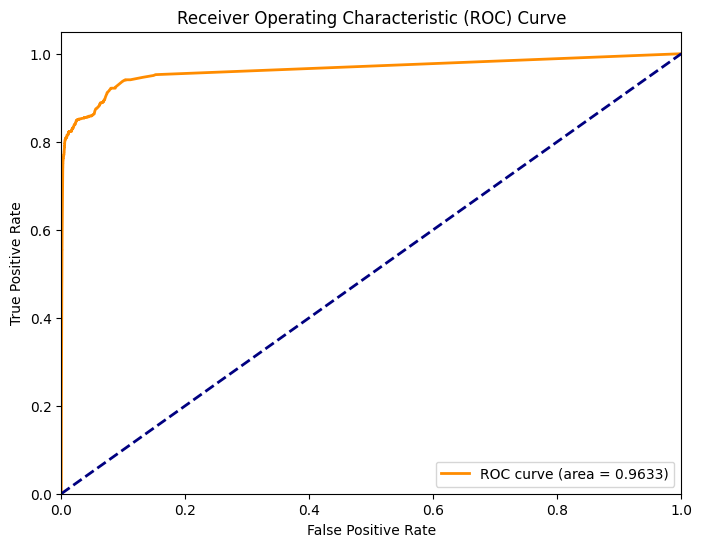

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Evaluate and print the test results
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Plot the ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Confusion Matrix**

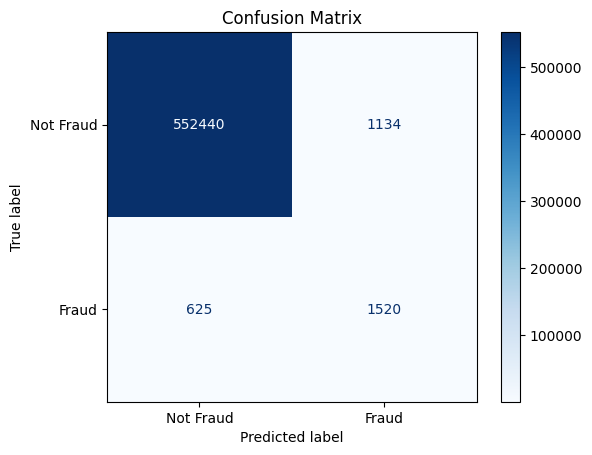

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Assuming y_test contains the true labels and y_test_pred contains the predicted labels
# Example from previous code: y_test_pred = (y_test_pred_proba > optimal_threshold_test).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip install lightgbm --install-option=--opencl


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


### Graph Neural Network (GNN) Implementation

In [ ]:
!pip install torch-geometric



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.5 MB/s eta 0:00:00


























   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00




##GCN with over sampling techniques

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, BatchNorm
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


file_path = '/kaggle/input/fraud-detection-dataset/fraudTest.csv'
df = pd.read_csv(file_path)

# Converting categorical variables to numeric
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
df['category'] = pd.factorize(df['category'])[0]

# Extracting unique credit cards and merchants
credit_card_nodes = df['cc_num'].unique()
merchant_nodes = df['merchant'].unique()

# Assigning a unique index to each node
credit_card_node_idx = {cc: idx for idx, cc in enumerate(credit_card_nodes)}
merchant_node_idx = {m: idx + len(credit_card_nodes) for idx, m in enumerate(merchant_nodes)}

# Creating node features for credit cards (e.g., gender, city_pop, lat, long)
credit_card_features = df.groupby('cc_num')[['gender', 'city_pop', 'lat', 'long']].mean().values

# Creating node features for merchants (e.g., merch_lat, merch_long)
merchant_features = df.groupby('merchant')[['merch_lat', 'merch_long']].mean().values

# Pad merchant features to match the credit card features (4 features: gender, city_pop, lat, long)
padded_merchant_features = np.hstack([np.zeros((merchant_features.shape[0], 2)), merchant_features])

# Combineing all node features
node_features = np.vstack([credit_card_features, padded_merchant_features])
node_features = torch.tensor(node_features, dtype=torch.float).to(device)

# Initializing lists for edges and edge features
edge_index = []
labels = []

# Create edges and edge features based on transactions
for index, row in df.iterrows():
    cc_idx = credit_card_node_idx[row['cc_num']]
    merchant_idx = merchant_node_idx[row['merchant']]

    # Edge from credit card to merchant
    edge_index.append([cc_idx, merchant_idx])

    # Add label (is_fraud) for each transaction edge
    labels.append(row['is_fraud'])

# Convert to torch tensors and transfer to device
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous().to(device)
labels = torch.tensor(labels, dtype=torch.float).to(device)

# Define the GCN model for edge-based classification
class GCN(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.bn1 = BatchNorm(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.bn2 = BatchNorm(hidden_channels)
        self.fc1 = nn.Linear(2 * hidden_channels, hidden_channels)
        self.fc2 = nn.Linear(hidden_channels, num_classes)
        self.dropout = nn.Dropout(0.5)  # Added dropout for regularization

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # Apply GCN layers with batch normalization and dropout
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout(x)

        # Aggregate node features for each edge (concatenate features from both nodes)
        row, col = edge_index
        edge_features = torch.cat([x[row], x[col]], dim=1)

        # Apply fully connected layers
        x = torch.relu(self.fc1(edge_features))
        x = self.fc2(x)
        return x

# Function to evaluate GCN model
def evaluate_gnn_model(model, data):
    model.eval()
    with torch.no_grad():
        pred = model(data).argmax(dim=1)

    y_true = data.y.cpu().numpy()
    y_pred = pred.cpu().numpy()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

# Define resampling techniques
resampling_techniques = {
    'Original': (None, labels.cpu().numpy()),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Store results
gnn_results = {}

# Outer loop for resampling techniques
for resampling_method, resampler in tqdm(resampling_techniques.items(), desc="Resampling Techniques"):

    if resampling_method != 'Original':
        # Resample the labels and corresponding edge indices
        edge_indices_resampled, labels_resampled = resampler.fit_resample(edge_index.cpu().numpy().T, labels.cpu().numpy())
        edge_indices_resampled = torch.tensor(edge_indices_resampled.T, dtype=torch.long).to(device)
        labels_resampled = torch.tensor(labels_resampled, dtype=torch.float).to(device)
    else:
        edge_indices_resampled = edge_index
        labels_resampled = labels

    # Create the data object for PyTorch Geometric
    data_resampled = Data(x=node_features, edge_index=edge_indices_resampled, y=labels_resampled)

    # Initialize and train the GCN model
    hidden_channels = 128
    num_classes = 2
    model = GCN(num_node_features=node_features.shape[1], hidden_channels=hidden_channels, num_classes=num_classes).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)  # Use AdamW optimizer with lower learning rate
    criterion = nn.CrossEntropyLoss()

    # Training loop
    num_epochs = 150
    for epoch in tqdm(range(num_epochs), desc=f"Training GCN Model ({resampling_method})", leave=False):
        model.train()
        optimizer.zero_grad()
        out = model(data_resampled)
        loss = criterion(out, data_resampled.y.long())
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

    # Evaluate the GCN model
    accuracy, precision, recall, f1 = evaluate_gnn_model(model, data_resampled)

    # Store results
    gnn_results[resampling_method] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Printing results
for resampling_method, metrics in gnn_results.items():
    print(f"\nResults for {resampling_method} Method:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")


Using device: cpu


Training GCN Model (Original):   7%|▋         | 10/150 [00:46<10:41,  4.58s/it]

Epoch 10/150, Loss: 0.0601



Training GCN Model (Original):  13%|█▎        | 20/150 [01:32<09:51,  4.55s/it]

Epoch 20/150, Loss: 0.0273



Training GCN Model (Original):  20%|██        | 30/150 [02:18<09:13,  4.61s/it]

Epoch 30/150, Loss: 0.0292



Training GCN Model (Original):  27%|██▋       | 40/150 [03:03<08:21,  4.56s/it]

Epoch 40/150, Loss: 0.0289



Training GCN Model (Original):  33%|███▎      | 50/150 [03:49<07:41,  4.61s/it]

Epoch 50/150, Loss: 0.0278



Training GCN Model (Original):  40%|████      | 60/150 [04:36<07:01,  4.68s/it]

Epoch 60/150, Loss: 0.0271



Training GCN Model (Original):  47%|████▋     | 70/150 [05:22<06:12,  4.66s/it]

Epoch 70/150, Loss: 0.0271



Training GCN Model (Original):  53%|█████▎    | 80/150 [06:07<05:18,  4.55s/it]

Epoch 80/150, Loss: 0.0271



Training GCN Model (Original):  60%|██████    | 90/150 [06:53<04:33,  4.55s/it]

Epoch 90/150, Loss: 0.0270



Training GCN Model (Original):  67%|██████▋   | 100/150 [07:39<03:47,  4.56s/it]

Epoch 100/150, Loss: 0.0268



Training GCN Model (Original):  73%|███████▎  | 110/150 [08:24<03:01,  4.55s/it]

Epoch 110/150, Loss: 0.0268



Training GCN Model (Original):  80%|████████  | 120/150 [09:10<02:16,  4.56s/it]

Epoch 120/150, Loss: 0.0268



Training GCN Model (Original):  87%|████████▋ | 130/150 [09:55<01:30,  4.53s/it]

Epoch 130/150, Loss: 0.0268



Training GCN Model (Original):  93%|█████████▎| 140/150 [10:41<00:45,  4.58s/it]

Epoch 140/150, Loss: 0.0268



Training GCN Model (Original): 100%|██████████| 150/150 [11:26<00:00,  4.51s/it]
                                                                                

Epoch 150/150, Loss: 0.0264


Training GCN Model (SMOTE):   7%|▋         | 10/150 [01:30<21:05,  9.04s/it]

Epoch 10/150, Loss: 0.6942



Training GCN Model (SMOTE):  13%|█▎        | 20/150 [03:00<19:36,  9.05s/it]

Epoch 20/150, Loss: 0.6890



Training GCN Model (SMOTE):  20%|██        | 30/150 [04:31<18:05,  9.04s/it]

Epoch 30/150, Loss: 0.6874



Training GCN Model (SMOTE):  27%|██▋       | 40/150 [06:01<16:39,  9.08s/it]

Epoch 40/150, Loss: 0.6839



Training GCN Model (SMOTE):  33%|███▎      | 50/150 [07:32<15:03,  9.03s/it]

Epoch 50/150, Loss: 0.6825



Training GCN Model (SMOTE):  40%|████      | 60/150 [09:03<13:38,  9.10s/it]

Epoch 60/150, Loss: 0.6841



Training GCN Model (SMOTE):  47%|████▋     | 70/150 [10:34<12:05,  9.07s/it]

Epoch 70/150, Loss: 0.6834



Training GCN Model (SMOTE):  53%|█████▎    | 80/150 [12:05<10:35,  9.08s/it]

Epoch 80/150, Loss: 0.6853



Training GCN Model (SMOTE):  60%|██████    | 90/150 [13:36<09:05,  9.08s/it]

Epoch 90/150, Loss: 0.6812



Training GCN Model (SMOTE):  67%|██████▋   | 100/150 [15:07<07:37,  9.15s/it]

Epoch 100/150, Loss: 0.6820



Training GCN Model (SMOTE):  73%|███████▎  | 110/150 [16:37<06:00,  9.02s/it]

Epoch 110/150, Loss: 0.6837



Training GCN Model (SMOTE):  80%|████████  | 120/150 [18:08<04:29,  9.00s/it]

Epoch 120/150, Loss: 0.6835



Training GCN Model (SMOTE):  87%|████████▋ | 130/150 [19:38<02:59,  9.00s/it]

Epoch 130/150, Loss: 0.6814



Training GCN Model (SMOTE): 100%|██████████| 150/150 [22:40<00:00,  9.09s/it]
                                                                             

Epoch 150/150, Loss: 0.6831


Training GCN Model (ADASYN):   7%|▋         | 10/150 [01:27<20:31,  8.80s/it]

Epoch 10/150, Loss: 0.6918



Training GCN Model (ADASYN):  13%|█▎        | 20/150 [02:56<19:02,  8.79s/it]

Epoch 20/150, Loss: 0.6901



Training GCN Model (ADASYN):  20%|██        | 30/150 [04:23<17:30,  8.76s/it]

Epoch 30/150, Loss: 0.6900



Training GCN Model (ADASYN):  27%|██▋       | 40/150 [05:51<16:03,  8.75s/it]

Epoch 40/150, Loss: 0.6882



Training GCN Model (ADASYN):  33%|███▎      | 50/150 [07:19<14:39,  8.79s/it]

Epoch 50/150, Loss: 0.6853



Training GCN Model (ADASYN):  40%|████      | 60/150 [08:46<13:12,  8.81s/it]

Epoch 60/150, Loss: 0.6853



Training GCN Model (ADASYN):  47%|████▋     | 70/150 [10:14<11:40,  8.76s/it]

Epoch 70/150, Loss: 0.6855



Training GCN Model (ADASYN):  53%|█████▎    | 80/150 [11:42<10:14,  8.78s/it]

Epoch 80/150, Loss: 0.6854



Training GCN Model (ADASYN):  60%|██████    | 90/150 [13:10<08:47,  8.79s/it]

Epoch 90/150, Loss: 0.6864



Training GCN Model (ADASYN):  67%|██████▋   | 100/150 [14:38<07:18,  8.77s/it]

Epoch 100/150, Loss: 0.6854



Training GCN Model (ADASYN):  73%|███████▎  | 110/150 [16:06<05:49,  8.74s/it]

Epoch 110/150, Loss: 0.6846



Training GCN Model (ADASYN):  80%|████████  | 120/150 [17:33<04:23,  8.78s/it]

Epoch 120/150, Loss: 0.6835



Training GCN Model (ADASYN):  87%|████████▋ | 130/150 [19:01<02:55,  8.79s/it]

Epoch 130/150, Loss: 0.6863



Training GCN Model (ADASYN):  93%|█████████▎| 140/150 [20:28<01:27,  8.75s/it]

Epoch 140/150, Loss: 0.6851



Training GCN Model (ADASYN): 100%|██████████| 150/150 [21:56<00:00,  8.78s/it]
                                                                              

Epoch 150/150, Loss: 0.6834


Training GCN Model (RandomUnderSampler):  11%|█         | 16/150 [00:00<00:03, 34.99it/s]

Epoch 10/150, Loss: 0.6759



Training GCN Model (RandomUnderSampler):  16%|█▌        | 24/150 [00:00<00:03, 34.78it/s]

Epoch 20/150, Loss: 0.6738



Training GCN Model (RandomUnderSampler):  24%|██▍       | 36/150 [00:01<00:03, 35.15it/s]

Epoch 30/150, Loss: 0.6625



Training GCN Model (RandomUnderSampler):  29%|██▉       | 44/150 [00:01<00:03, 34.83it/s]

Epoch 40/150, Loss: 0.6650



Training GCN Model (RandomUnderSampler):  37%|███▋      | 56/150 [00:01<00:02, 33.85it/s]

Epoch 50/150, Loss: 0.6663



Training GCN Model (RandomUnderSampler):  43%|████▎     | 64/150 [00:01<00:02, 29.63it/s]

Epoch 60/150, Loss: 0.6632



Training GCN Model (RandomUnderSampler):  49%|████▉     | 74/150 [00:02<00:03, 24.32it/s]

Epoch 70/150, Loss: 0.6622



Training GCN Model (RandomUnderSampler):  55%|█████▌    | 83/150 [00:02<00:02, 23.32it/s]

Epoch 80/150, Loss: 0.6569



Training GCN Model (RandomUnderSampler):  65%|██████▍   | 97/150 [00:03<00:01, 29.23it/s]

Epoch 90/150, Loss: 0.6510



Training GCN Model (RandomUnderSampler):  70%|███████   | 105/150 [00:03<00:01, 31.59it/s]

Epoch 100/150, Loss: 0.6564



Training GCN Model (RandomUnderSampler):  78%|███████▊  | 117/150 [00:03<00:00, 33.29it/s]

Epoch 110/150, Loss: 0.6577



Training GCN Model (RandomUnderSampler):  83%|████████▎ | 125/150 [00:04<00:00, 33.07it/s]

Epoch 120/150, Loss: 0.6562



Training GCN Model (RandomUnderSampler):  89%|████████▊ | 133/150 [00:04<00:00, 32.34it/s]

Epoch 130/150, Loss: 0.6536



Training GCN Model (RandomUnderSampler):  97%|█████████▋| 145/150 [00:04<00:00, 33.72it/s]

Epoch 140/150, Loss: 0.6564



Resampling Techniques:  67%|██████▋   | 4/6 [56:23<24:10, 725.30s/it]                     

Epoch 150/150, Loss: 0.6520



Training GCN Model (SMOTEENN):   7%|▋         | 10/150 [01:06<15:32,  6.66s/it]

Epoch 10/150, Loss: 0.6876



Training GCN Model (SMOTEENN):  13%|█▎        | 20/150 [02:13<14:25,  6.66s/it]

Epoch 20/150, Loss: 0.6781



Training GCN Model (SMOTEENN):  20%|██        | 30/150 [03:19<13:15,  6.63s/it]

Epoch 30/150, Loss: 0.6777



Training GCN Model (SMOTEENN):  27%|██▋       | 40/150 [04:27<12:18,  6.71s/it]

Epoch 40/150, Loss: 0.6782



Training GCN Model (SMOTEENN):  33%|███▎      | 50/150 [05:34<11:08,  6.69s/it]

Epoch 50/150, Loss: 0.6724



Training GCN Model (SMOTEENN):  40%|████      | 60/150 [06:42<10:01,  6.68s/it]

Epoch 60/150, Loss: 0.6764



Training GCN Model (SMOTEENN):  47%|████▋     | 70/150 [07:49<09:02,  6.78s/it]

Epoch 70/150, Loss: 0.6713



Training GCN Model (SMOTEENN):  53%|█████▎    | 80/150 [08:56<07:50,  6.72s/it]

Epoch 80/150, Loss: 0.6824



Training GCN Model (SMOTEENN):  60%|██████    | 90/150 [10:03<06:46,  6.77s/it]

Epoch 90/150, Loss: 0.6744



Training GCN Model (SMOTEENN):  67%|██████▋   | 100/150 [11:10<05:33,  6.66s/it]

Epoch 100/150, Loss: 0.6653



Training GCN Model (SMOTEENN):  73%|███████▎  | 110/150 [12:16<04:26,  6.67s/it]

Epoch 110/150, Loss: 0.6727



Training GCN Model (SMOTEENN):  80%|████████  | 120/150 [13:23<03:19,  6.65s/it]

Epoch 120/150, Loss: 0.6739



Training GCN Model (SMOTEENN):  87%|████████▋ | 130/150 [14:29<02:12,  6.64s/it]

Epoch 130/150, Loss: 0.6773



Training GCN Model (SMOTEENN):  93%|█████████▎| 140/150 [15:36<01:06,  6.66s/it]

Epoch 140/150, Loss: 0.6730



Training GCN Model (SMOTEENN): 100%|██████████| 150/150 [16:43<00:00,  6.61s/it]
                                                                                

Epoch 150/150, Loss: 0.6717


Training GCN Model (SMOTETomek):   7%|▋         | 10/150 [01:30<21:17,  9.12s/it]

Epoch 10/150, Loss: 0.6939



Training GCN Model (SMOTETomek):  13%|█▎        | 20/150 [03:00<19:28,  8.99s/it]

Epoch 20/150, Loss: 0.6884



Training GCN Model (SMOTETomek):  20%|██        | 30/150 [04:30<17:58,  8.99s/it]

Epoch 30/150, Loss: 0.6879



Training GCN Model (SMOTETomek):  27%|██▋       | 40/150 [06:00<16:32,  9.03s/it]

Epoch 40/150, Loss: 0.6873



Training GCN Model (SMOTETomek):  33%|███▎      | 50/150 [07:31<15:02,  9.03s/it]

Epoch 50/150, Loss: 0.6838



Training GCN Model (SMOTETomek):  40%|████      | 60/150 [09:01<13:32,  9.03s/it]

Epoch 60/150, Loss: 0.6823



Training GCN Model (SMOTETomek):  47%|████▋     | 70/150 [10:31<12:01,  9.01s/it]

Epoch 70/150, Loss: 0.6828



Training GCN Model (SMOTETomek):  53%|█████▎    | 80/150 [12:01<10:26,  8.96s/it]

Epoch 80/150, Loss: 0.6822



Training GCN Model (SMOTETomek):  60%|██████    | 90/150 [13:31<09:01,  9.03s/it]

Epoch 90/150, Loss: 0.6817



Training GCN Model (SMOTETomek):  67%|██████▋   | 100/150 [15:01<07:31,  9.02s/it]

Epoch 100/150, Loss: 0.6821



Training GCN Model (SMOTETomek):  73%|███████▎  | 110/150 [16:32<06:00,  9.01s/it]

Epoch 110/150, Loss: 0.6827



Training GCN Model (SMOTETomek):  80%|████████  | 120/150 [18:02<04:30,  9.01s/it]

Epoch 120/150, Loss: 0.6827



Training GCN Model (SMOTETomek):  87%|████████▋ | 130/150 [19:32<02:58,  8.94s/it]

Epoch 130/150, Loss: 0.6837



Training GCN Model (SMOTETomek):  93%|█████████▎| 140/150 [21:01<01:29,  8.95s/it]

Epoch 140/150, Loss: 0.6826



Training GCN Model (SMOTETomek): 100%|██████████| 150/150 [22:31<00:00,  8.96s/it]
                                                                                  

Epoch 150/150, Loss: 0.6829


Resampling Techniques: 100%|██████████| 6/6 [1:36:06<00:00, 961.09s/it] 


Results for Original Method:
  Accuracy: 0.9961
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000

Results for SMOTE Method:
  Accuracy: 0.5224
  Precision: 0.6468
  Recall: 0.0989
  F1 Score: 0.1716

Results for ADASYN Method:
  Accuracy: 0.5512
  Precision: 0.6047
  Recall: 0.2977
  F1 Score: 0.3990

Results for RandomUnderSampler Method:
  Accuracy: 0.6161
  Precision: 0.5924
  Recall: 0.7441
  F1 Score: 0.6596

Results for SMOTEENN Method:
  Accuracy: 0.5520
  Precision: 0.6924
  Recall: 0.0046
  F1 Score: 0.0090

Results for SMOTETomek Method:
  Accuracy: 0.5397
  Precision: 0.6445
  Recall: 0.1769
  F1 Score: 0.2776


In [ ]:
pip install torch torch_geometric pandas numpy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch torch_geometric pandas numpy scikit-learn

  Using cached torch_geometric-2.5.3-py3-none-any.whl.metadata (64 kB)
  Using cached aiohttp-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
  Using cached aiohappyeyeballs-2.3.5-py3-none-any.whl.metadata (5.8 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached yarl-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
Using cached torch_geometric-2.5.3-py3-none-any.whl (1.1 MB)
Using cached aiohttp-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
Using cached aiohappyeyeballs-2.3.5-py3-none-any.whl (12 kB)
Using cached aiosignal-1.3.1-py3-none-

In [ ]:
!pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install torch torchvision torchaudio


In [ ]:
!pip install torch-geometric
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-geometric
import torch_geometric
print(torch_geometric.__version__)


  Using cached torch_geometric-2.5.3-py3-none-any.whl.metadata (64 kB)
  Using cached aiohttp-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
  Using cached aiohappyeyeballs-2.3.5-py3-none-any.whl.metadata (5.8 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached yarl-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
Using cached torch_geometric-2.5.3-py3-none-any.whl (1.1 MB)
Using cached aiohttp-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
Using cached aiohappyeyeballs-2.3.5-py3-none-any.whl (12 kB)
Using cached aiosignal-1.3.1-py3-none-

In [ ]:
!pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.22.3-py3-none-manylinux2014_x86_64.whl (190.9 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


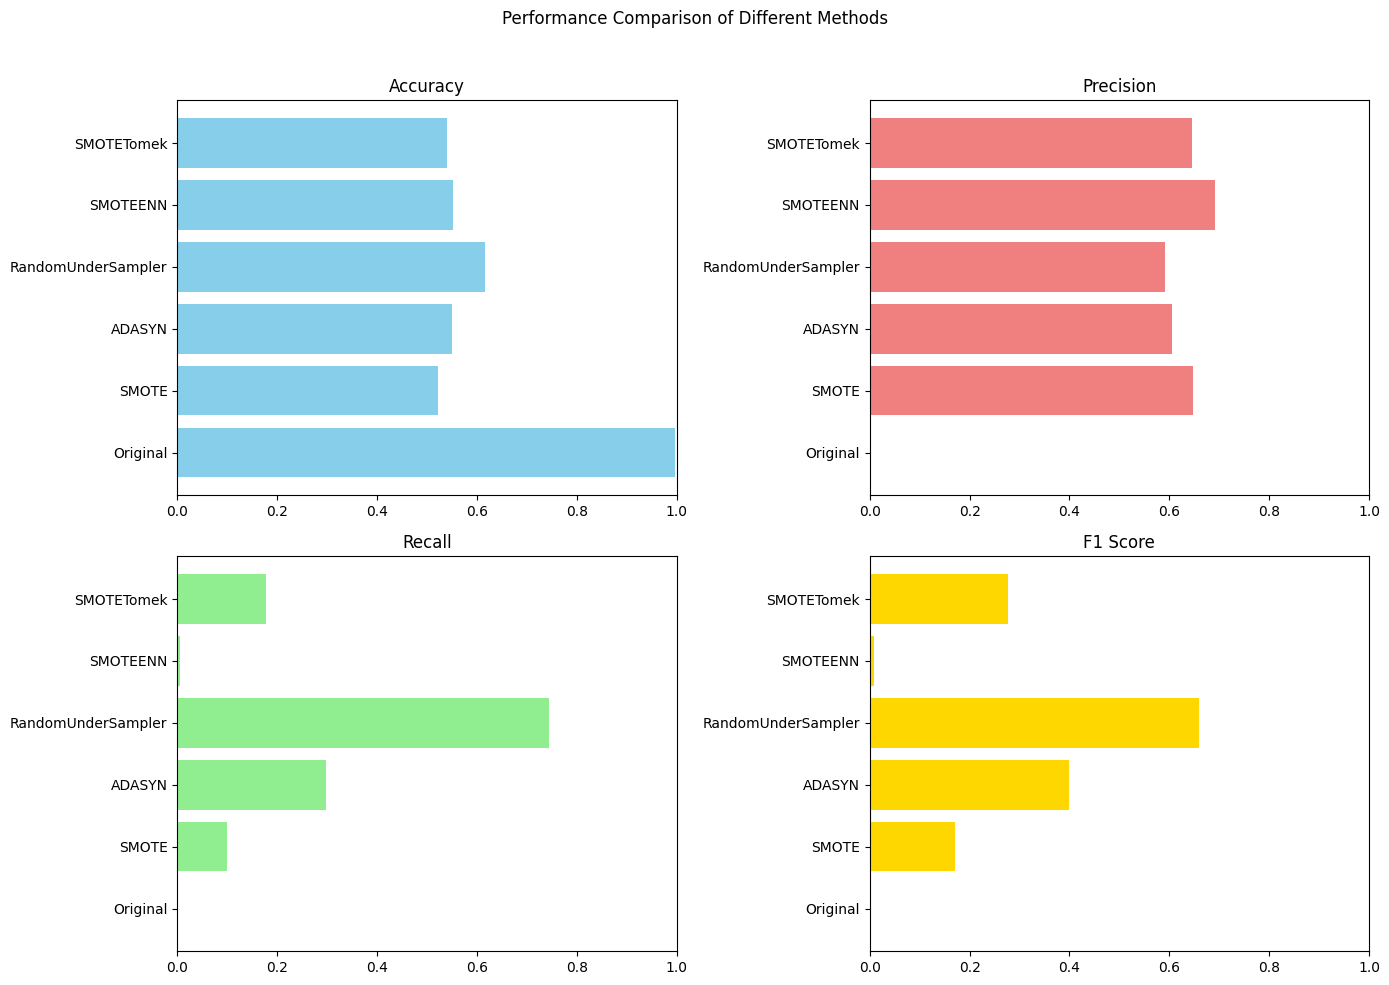

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the methods and their respective metrics
methods = ['Original', 'SMOTE', 'ADASYN', 'RandomUnderSampler', 'SMOTEENN', 'SMOTETomek']
accuracy = [0.9961, 0.5224, 0.5512, 0.6161, 0.5520, 0.5397]
precision = [0.0000, 0.6468, 0.6047, 0.5924, 0.6924, 0.6445]
recall = [0.0000, 0.0989, 0.2977, 0.7441, 0.0046, 0.1769]
f1_score = [0.0000, 0.1716, 0.3990, 0.6596, 0.0090, 0.2776]

# Set up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Performance Comparison of Different Methods')

# Plot Accuracy
ax[0, 0].barh(methods, accuracy, color='skyblue')
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_xlim(0, 1)

# Plot Precision
ax[0, 1].barh(methods, precision, color='lightcoral')
ax[0, 1].set_title('Precision')
ax[0, 1].set_xlim(0, 1)

# Plot Recall
ax[1, 0].barh(methods, recall, color='lightgreen')
ax[1, 0].set_title('Recall')
ax[1, 0].set_xlim(0, 1)

# Plot F1 Score
ax[1, 1].barh(methods, f1_score, color='gold')
ax[1, 1].set_title('F1 Score')
ax[1, 1].set_xlim(0, 1)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()
